# Reading in Packages used in analysis

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
import glob
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = None

# Read in the source data, clean up DataFrames

## Read in Regression Model Data & clean

Reading in the regression file & performing some data clean-up to get rid of year and university values that we don't want to use + get rid of some of the columns that are used in the R script

In [2]:
# Reading in the Regression Model file
model = pd.read_excel(
    r'C:\Users\bruno\Documents\Data Analytics\210106 KMeans Clustering of UniForum Activity Data\01. Source Data\201022 Consulting Regression File CAD (Modified for (91Pa Dec Data).xlsx', engine='openpyxl')

# Print out unique Year and Uni values
model.Year.unique()
model.Uni.unique()

array(['2017', '2016', '2015', '2017-2019', '2019', '2018', '2014',
       '2013', '2012', '2020', '1920', '2019-2019'], dtype=object)

array(['01H', '05B', '06C', '07N', '08O', '09F', '10Ne', '11Na', '12Mg',
       '13Al', '14Si', '15P', '16S', '17Cl', '18Ar', '19K', '20Ca',
       '21Sc', '22Ti', '23V', '24Cr', '25Mn', '26Fe', '27Co', '28Ni',
       '29Cu', '30Zn', '37Rb', '38Sr', '39Y', '40Zr', '41Nb', '42Mo',
       '43Tc', '44Ru', '45Rh', '46Pd', '47Ag', '48Cd', '49In', '51Sb',
       '52Te', '53I', '54Xe', '55Cs', '57La', '58Ce', '59Pr', '87Fr',
       '88Ra', '89Ac', '90Th', '91Pa', 'Ave ANZ',
       'Ave ANZ Collected 2012-2016',
       'Ave ANZ Collected 2018 Group (excl. 17Cl and 05B)',
       'Ave ANZ Collected 2018 Group (excl. 17Cl)',
       'Ave ANZ Collected since 2012', 'Ave ANZ Collected since 2015',
       'Ave ANZ/EU', 'Ave AUS', 'Ave CAN',
       'Ave First ANZ Chg Group (06C, 08O, 09F, 22Ti)',
       'Ave First ANZ Chg Group incl. 16S (06C, 08O, 09F, 22Ti and 16S)',
       'Ave Global', 'Ave Go5', 'Ave Go8', 'Ave Go8 exc. 21Sc',
       'Ave Go8 excl. 14Si and 21Sc',
       'Ave Non-Go8 ANZ Collecte

In [3]:
# --- Perform clean-up of data ---
# Get rid of test uni & custom university groups
uni_to_include = ['05B', '06C', '07N', '08O', '09F', '10Ne', '11Na', '12Mg', '13Al',
                  '14Si', '15P', '16S', '17Cl', '18Ar', '19K', '20Ca', '21Sc',
                  '22Ti', '23V', '24Cr', '25Mn', '26Fe', '27Co', '28Ni', '29Cu', '30Zn', '38Sr', '39Y',
                  '41Nb', '42Mo', '44Ru', '45Rh', '46Pd', '47Ag', '37Rb', '40Zr', '48Cd', '49In', '51Sb', '53I', '54Xe', '43Tc',
                  '52Te', '55Cs', '87Fr', '88Ra', '89Ac', '57La', '58Ce', '59Pr', '90Th', '91Pa']
model = model[model['Uni'].isin(uni_to_include)]

# Get rid of non relevant Years
year_to_include = ['2012', '2013', '2014', '2015',
                   '2016', '2017', '2018', '2019', '2020']
model = model[model['Year'].isin(year_to_include)]

# Convert Year variable into Int
model['Year'] = model['Year'].astype(int)

# Verify Data clean-up was successful
print("These unique values for Uni were found:")
model['Uni'].unique()  # Print out Unique Uni values
print("There's "+str(model['Uni'].unique().size)+" Unique universities.\n")

print("These unique values for Year were found:")
model['Year'].unique()  # Print out Unique Year values

# Get rid of unwanted columns
model = model[['Unit', 'Type', 'Currency', 'Level', 'Metric', 'Year', 'Uni',
               'Teaching Revenue 3Yr Reference', 'Research Revenue 3Yr Reference', 'Actual',
               'Predicted 3Yr Reference', 'Norm 3Yr Reference']]

model.head(30)  # Print out DataFrame

These unique values for Uni were found:


array(['05B', '06C', '07N', '08O', '09F', '10Ne', '11Na', '12Mg', '13Al',
       '14Si', '15P', '16S', '17Cl', '18Ar', '19K', '20Ca', '21Sc',
       '22Ti', '23V', '24Cr', '25Mn', '26Fe', '27Co', '28Ni', '29Cu',
       '30Zn', '37Rb', '38Sr', '39Y', '40Zr', '41Nb', '42Mo', '43Tc',
       '44Ru', '45Rh', '46Pd', '47Ag', '48Cd', '49In', '51Sb', '52Te',
       '53I', '54Xe', '55Cs', '57La', '58Ce', '59Pr', '87Fr', '88Ra',
       '89Ac', '90Th', '91Pa'], dtype=object)

There's 52 Unique universities.

These unique values for Year were found:


array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2020], dtype=int64)

,Unit,Type,Currency,Level,Metric,Year,Uni,Teaching Revenue 3Yr Reference,Research Revenue 3Yr Reference,Actual,Predicted 3Yr Reference,Norm 3Yr Reference
4448,Cost,Real,CAD,L0,T1 University Total,2019,05B,984.446171,456.442584,458.086958,413.873984,110.682714
4449,Cost,Real,CAD,L0,T2 Administration,2019,05B,984.446171,456.442584,351.749693,322.555706,109.050836
4450,Cost,Real,CAD,L0,T3 Operations,2019,05B,984.446171,456.442584,296.370768,275.391522,107.617971
4451,Cost,Real,CAD,L0,T4 Develop & Transform,2019,05B,984.446171,456.442584,55.378925,45.846222,120.792778
4452,Cost,Real,CAD,L0,T5 Ops. Transactional,2019,05B,984.446171,456.442584,145.116955,142.392009,101.913694
4453,Cost,Real,CAD,L0,T6 Ops. Non-transactional,2019,05B,984.446171,456.442584,116.507050,104.906779,111.057694
4454,Cost,Real,CAD,L0,T7 Ops. Hybrid,2019,05B,984.446171,456.442584,34.746763,28.092734,123.685940
4455,Cost,Real,CAD,L0,T1 University Total,2018,05B,944.270327,423.540253,443.924749,393.996357,112.672298
4456,Cost,Real,CAD,L0,T2 Administration,2018,05B,944.270327,423.540253,345.817212,307.310410,112.530263
4457,Cost,Real,CAD,L0,T3 Operations,2018,05B,944.270327,423.540253,285.884730,262.473475,108.919475


## Read in Service Delivery Model Data  & clean

In [4]:
# Read in the Service Delivery Model UFA data dump
sdm = pd.DataFrame()
for f in glob.glob("./01. Source Data/210106 Master*.xlsx"):
    df = pd.read_excel(f, engine='openpyxl')
    sdm = sdm.append(df, ignore_index=True)

In [5]:
print("These unique universities were found:")
sdm['University Code'].unique()
print("There's " +
      str(sdm['University Code'].unique().size)+" Unique universities.\n")

print("These unique Col. Years were found:")
sdm['Collection Period'].unique()

# --- Rename and recast Column ---
sdm.astype({'Collection Period': 'int'}).dtypes
sdm = sdm.rename(columns={"Collection Period": "Year"})
sdm = sdm.rename(columns={"Own Uni - Cost (CAD M)": "Cost"})

sdm.head(25)

context_data = sdm[['Year','Latest Activity Collection','Region','University Code']]
context_data.drop_duplicates()
context_data = context_data.rename(columns={"University Code": "Uni"})

region = {'Australia': 'ANZ',
          'New Zealand': 'ANZ',
          'United Kingdom': 'UK & IRL',
          'Canada': 'CAN',
          'Ireland': 'UK & IRL'}

context_data['Region'] = context_data['Region'].map(region)
context_data = context_data.drop_duplicates().set_index(['Uni', 'Year'])

context_data.head(5)

These unique universities were found:


array(['05B', '06C', '07N', '08O', '09F', '10Ne', '11Na', '12Mg', '13Al',
       '14Si', '15P', '16S', '17Cl', '18Ar', '19K', '20Ca', '21Sc',
       '22Ti', '23V', '24Cr', '25Mn', '26Fe', '27Co', '28Ni', '29Cu',
       '30Zn', '38Sr', '39Y', '41Nb', '42Mo', '44Ru', '45Rh', '46Pd',
       '47Ag', '37Rb', '40Zr', '48Cd', '49In', '51Sb', '53I', '54Xe',
       '52Te', '87Fr', '88Ra', '89Ac', '43Tc', '55Cs', '91Pa', '57La',
       '58Ce', '59Pr', '90Th'], dtype=object)

There's 52 Unique universities.

These unique Col. Years were found:


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Collection Period               int32
Latest Activity Collection     object
Region                         object
University Code                object
Service Grouping Name          object
Function Name                  object
Sub-function Name              object
Activity Name                  object
Activity Type                  object
Org Scope                      object
Org Primary Function           object
Function Alignment             object
Employment Type                object
Function Focus                 object
Sub-function Focus             object
Activity Focus                 object
Competency Band                object
Total Employment Cost Band     object
Time Allocation Category       object
Position Type                  object
Own Uni - Cost (CAD M)        float64
wFTE                          float64
dtype: object

,Year,Latest Activity Collection,Region,University Code,Service Grouping Name,Function Name,Sub-function Name,Activity Name,Activity Type,Org Scope,Org Primary Function,Function Alignment,Employment Type,Function Focus,Sub-function Focus,Activity Focus,Competency Band,Total Employment Cost Band,Time Allocation Category,Position Type,Cost,wFTE
0,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,4.380596,105.1802
1,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.30 FM Maintenance and Local Requirements M...,FM15 Maint On-the-Tools,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,6.873013,70.7247
2,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM02 Security Service & Parking,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,1.833958,41.2821
3,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.30 FM Maintenance and Local Requirements M...,FM14 Maint & sust mgnt & supervision,03. Hybrid,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,1.794089,15.2036
4,2012,N,Australia,05B,T3 Operations,090. Library,090.99 Library Information Services,LI02 Ref. info. to stu. and acad.,03. Hybrid,01. Central - All Divisions,09. Library - Central,01. Central - Function Aligned,01. Full Time,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,02. Band Two,03. 50-75 Percentile Median Capacity,06. TAC81-100,Continuing,0.965816,14.1566
5,2012,N,Australia,05B,T3 Operations,050. Information Technology,050.80 IT Client Services - S&M,IT17 IT Service Desk Staff&HDRS,01. Transactional,01. Central - All Divisions,05. Information Technology - Central,01. Central - Function Aligned,01. Full Time,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,02. Band Two,02. 25-50 Percentile Median Capacity,06. TAC81-100,Continuing,0.789715,12.2545
6,2012,N,Australia,05B,T3 Operations,050. Information Technology,050.80 IT Client Services - S&M,IT16 Wkspace Comp. Staff&PGR (S&M),01. Transactional,01. Central - All Divisions,05. Information Technology - Central,01. Central - Function Aligned,01. Full Time,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,02. Band Two,03. 50-75 Percentile Median Capacity,06. TAC81-100,Continuing,0.854596,12.0055
7,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.30 FM Maintenance and Local Requirements M...,FM09 Grounds - maintain & manage,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,0.465506,10.4785
8,2012,N,Australia,05B,T3 Operations,040. General Administration,"040.10 PA, EA & Receptions",GA01 General Admin support,01. Transactional,03. Schools & Research,01. Faculties & Schools,04. Schools & Research,03. Casual,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,01. Band One,01. <=25 Percentile Median Capacity,06. TAC

,Year,Latest Activity Collection,Region,University Code
0,2012,N,Australia,05B
8156,2012,N,Australia,06C
17102,2012,N,Australia,07N
24181,2012,N,New Zealand,08O
29353,2012,N,Australia,09F
...,...,...,...,...
1457746,2019,Y,Canada,90Th
1471776,2020,Y,United Kingdom,52Te
1479610,2020,Y,Canada,88Ra
1486444,2020,Y,Canada,89Ac


,,Latest Activity Collection,Region
Uni,Year,,
05B,2012,N,ANZ
06C,2012,N,ANZ
07N,2012,N,ANZ
08O,2012,N,ANZ
09F,2012,N,ANZ
...,...,...,...
90Th,2019,Y,CAN
52Te,2020,Y,UK & IRL
88Ra,2020,Y,CAN


,Year,Latest Activity Collection,Region,Uni
0,2012,N,ANZ,05B
1,2012,N,ANZ,05B
2,2012,N,ANZ,05B
3,2012,N,ANZ,05B
4,2012,N,ANZ,05B


## Filter Source Data
(e.g. function/ sub-function/ activity or Service Grouping Name)

In [8]:
# --- Filter both the Model & the SDM dataset
model.head(5)
sdm.head(5)

,Unit,Type,Currency,Level,Metric,Year,Uni,Teaching Revenue 3Yr Reference,Research Revenue 3Yr Reference,Actual,Predicted 3Yr Reference,Norm 3Yr Reference
4448,Cost,Real,CAD,L0,T1 University Total,2019,05B,984.446171,456.442584,458.086958,413.873984,110.682714
4449,Cost,Real,CAD,L0,T2 Administration,2019,05B,984.446171,456.442584,351.749693,322.555706,109.050836
4450,Cost,Real,CAD,L0,T3 Operations,2019,05B,984.446171,456.442584,296.370768,275.391522,107.617971
4451,Cost,Real,CAD,L0,T4 Develop & Transform,2019,05B,984.446171,456.442584,55.378925,45.846222,120.792778
4452,Cost,Real,CAD,L0,T5 Ops. Transactional,2019,05B,984.446171,456.442584,145.116955,142.392009,101.913694


,Year,Latest Activity Collection,Region,University Code,Service Grouping Name,Function Name,Sub-function Name,Activity Name,Activity Type,Org Scope,Org Primary Function,Function Alignment,Employment Type,Function Focus,Sub-function Focus,Activity Focus,Competency Band,Total Employment Cost Band,Time Allocation Category,Position Type,Cost,wFTE
0,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,4.380596,105.1802
1,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.30 FM Maintenance and Local Requirements M...,FM15 Maint On-the-Tools,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,6.873013,70.7247
2,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM02 Security Service & Parking,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,1.833958,41.2821
3,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.30 FM Maintenance and Local Requirements M...,FM14 Maint & sust mgnt & supervision,03. Hybrid,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,1.794089,15.2036
4,2012,N,Australia,05B,T3 Operations,090. Library,090.99 Library Information Services,LI02 Ref. info. to stu. and acad.,03. Hybrid,01. Central - All Divisions,09. Library - Central,01. Central - Function Aligned,01. Full Time,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,02. Band Two,03. 50-75 Percentile Median Capacity,06. TAC81-100,Continuing,0.965816,14.1566


### Filter: Service Grouping

In [ ]:
# 1. Service grouping
model = model[model['Metric']=="020. Human Resources (Ops)"]
sdm = sdm[sdm['Service Grouping Name']=="T3 Operations"]

### Filter: Tx or NTx

In [ ]:
# 2. Tx/ NTx grouping

### Filter: Sub-Function

In [ ]:
# 3. Sub-Function grouping

#Employment advisory
model = model[model['Metric']=='020.20 EmpAdvisor']
sdm = sdm[(sdm['Service Grouping Name']=="T3 Operations") & (sdm['Sub-function Name']=='020.20 Employment Advisory & Recruiting Services')]

### Filter: Activity

In [9]:
# Put in activity to filter
activity_to_filter = 'FM01 Cleaning  Service'

# filtering both datasets
model = model[model['Metric']==activity_to_filter]
sdm = sdm[(sdm['Service Grouping Name']=="T3 Operations") & (sdm['Activity Name']==activity_to_filter)]

### Confirm filtering successful

In [10]:
model.head(5)
sdm.head(5)

,Unit,Type,Currency,Level,Metric,Year,Uni,Teaching Revenue 3Yr Reference,Research Revenue 3Yr Reference,Actual,Predicted 3Yr Reference,Norm 3Yr Reference
5945,Cost,Real,CAD,L3,FM01 Cleaning Service,2019,05B,984.446171,456.442584,8.565050,8.123236,105.438892
6098,Cost,Real,CAD,L3,FM01 Cleaning Service,2018,05B,944.270327,423.540253,7.144836,7.732723,92.397418
6251,Cost,Real,CAD,L3,FM01 Cleaning Service,2017,05B,881.474161,411.614163,6.249465,7.412389,84.311082
6401,Cost,Real,CAD,L3,FM01 Cleaning Service,2016,05B,789.664517,394.926081,6.025438,6.949546,86.702608
6544,Cost,Real,CAD,L3,FM01 Cleaning Service,2015,05B,715.553305,375.473755,6.179040,6.532008,94.596344


,Year,Latest Activity Collection,Region,University Code,Service Grouping Name,Function Name,Sub-function Name,Activity Name,Activity Type,Org Scope,Org Primary Function,Function Alignment,Employment Type,Function Focus,Sub-function Focus,Activity Focus,Competency Band,Total Employment Cost Band,Time Allocation Category,Position Type,Cost,wFTE
0,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,04. Supplier,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,10. Supplier,06. Supplier,06. TAC81-100,Supplier,4.380596,105.1802
126,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,01. Full Time,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,01. Band One,01. <=25 Percentile Median Capacity,06. TAC81-100,Continuing,0.103009,1.8000
1037,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,01. Full Time,01. Function Focus < 80%,01. Sub-function Focus < 80%,01. Activity Focus <=50%,02. Band Two,03. 50-75 Percentile Median Capacity,02. TAC11-20,Continuing,0.036216,0.5028
2677,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,01. Central - All Divisions,06. Facilities Management - Central,01. Central - Function Aligned,03. Casual,02. Function Focus >= 80%,02. Sub-function Focus >= 80%,03. Activity Focus >= 80%,01. Band One,01. <=25 Percentile Median Capacity,06. TAC81-100,Casual,0.009195,0.2078
2682,2012,N,Australia,05B,T3 Operations,060. Facilities Management,060.10 Property Services,FM01 Cleaning Service,01. Transactional,03. Schools & Research,01. Faculties & Schools,04. Schools & Research,03. Casual,01. Function Focus < 80%,01. Sub-function Focus < 80%,01. Activity Focus <=50%,01. Band One,01. <=25 Percentile Median Capacity,04. TAC41-60,Casual,0.009953,0.2060


## Pivot SDM data
For the analysis, we would like to end up with calculated SDM metrics per university & collection period.
<br>Example: *06C // 2012 // 100% of capacity Function Focussed // 85% of capacity is activity focussed*

The next code calculatess that based on the original SMD DataFrame

In [12]:
# !!!!!!!!!!!!! IMPROVEMENT OVER CODE IN CELL 18

# Produce SDM outputs without selecting 1 variable from the column ~ Comment out if you don't want to include in analysis
sdm_to_produce = {
    'Org Scope': 'central',
    'Org Primary Function': '',
    'Function Alignment': '',

    'Employment Type': '',

    'Function Focus': '',
    'Sub-function Focus': '',
    'Activity Focus': '',

    'Competency Band': '',
    'Total Employment Cost Band': '',
    'Time Allocation Category': ''

    # 'Activity Type':'',
}

metric_to_use = 'Cost'
sgn = 'T3 Operations'

for col in sdm_to_produce:
    col_to_pivot = col # What column to use to pivot the data on
    dataframe_to_keep = sdm_to_produce[col] # Determine what dataframe to temporarily store the data in
    
    temp = sdm[sdm['Service Grouping Name'] == sgn].groupby(['Year', 'University Code', col_to_pivot]).agg(
        {metric_to_use: 'sum'}).groupby(level=[0, 1]).apply(lambda x: x / float(x.sum()))
    temp = temp.reset_index(drop=False)
    temp = temp.pivot_table(values='Cost', index=[
                            'Year', 'University Code'], columns=col_to_pivot, aggfunc='sum').reset_index(drop=False).fillna(0)

    temp = temp.rename(columns={"University Code": "Uni"})
    sdm_to_produce[col] = temp


print(sdm_to_produce)
    
for col in sdm_to_produce:
    sdm_to_produce[col].head(5)

{'Org Scope': Org Scope  Year   Uni  01. Central - All Divisions  02. Faculty Centre  \
0          2012   05B                     0.993122            0.002670   
1          2012   06C                     0.997648            0.000035   
2          2012   07N                     0.987524            0.007080   
3          2012   08O                     0.999248            0.000000   
4          2012   09F                     0.965049            0.001129   
..          ...   ...                          ...                 ...   
205        2019  91Pa                     0.965757            0.029468   
206        2020  52Te                     1.000000            0.000000   
207        2020  88Ra                     0.971928            0.027814   
208        2020  89Ac                     0.820782            0.175639   
209        2020  91Pa                     0.962929            0.031447   

Org Scope  03. Schools & Research  04. Institute  Unknown  
0                        0.004208    

Org Scope,Year,Uni,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown
0,2012,05B,0.993122,0.002670,0.004208,0.00000,0.0
1,2012,06C,0.997648,0.000035,0.002317,0.00000,0.0
2,2012,07N,0.987524,0.007080,0.005075,0.00032,0.0
3,2012,08O,0.999248,0.000000,0.000752,0.00000,0.0
4,2012,09F,0.965049,0.001129,0.033822,0.00000,0.0


Org Primary Function,Year,Uni,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),Unknown
0,2012,05B,0.006878,0.0,0.0,0.0,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000365,0.0,0.0
1,2012,06C,0.002352,0.0,0.0,0.0,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2012,07N,0.012476,0.0,0.0,0.0,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,2012,08O,0.000752,0.0,0.0,0.0,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,2012,09F,0.034951,0.0,0.0,0.0,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Function Alignment,Year,Uni,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,Unmapped
0,2012,05B,0.992757,0.000365,0.002670,0.004208,0.00000,0.0
1,2012,06C,0.997648,0.000000,0.000035,0.002317,0.00000,0.0
2,2012,07N,0.987524,0.000000,0.007080,0.005075,0.00032,0.0
3,2012,08O,0.999248,0.000000,0.000000,0.000752,0.00000,0.0
4,2012,09F,0.959356,0.005693,0.001129,0.033822,0.00000,0.0


Employment Type,Year,Uni,01. Full Time,02. Part Time,03. Casual,04. Supplier
0,2012,05B,0.034855,0.000000,0.004562,0.960582
1,2012,06C,0.015564,0.000000,0.005447,0.978989
2,2012,07N,0.057222,0.158875,0.003137,0.780766
3,2012,08O,0.017320,0.000109,0.000643,0.981929
4,2012,09F,0.025453,0.035216,0.001485,0.937846


Function Focus,Year,Uni,01. Function Focus < 80%,02. Function Focus >= 80%
0,2012,05B,0.014458,0.985542
1,2012,06C,0.015564,0.984436
2,2012,07N,0.020320,0.979680
3,2012,08O,0.005523,0.994477
4,2012,09F,0.002424,0.997576


Sub-function Focus,Year,Uni,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%
0,2012,05B,0.015182,0.984818
1,2012,06C,0.017269,0.982731
2,2012,07N,0.020320,0.979680
3,2012,08O,0.010475,0.989525
4,2012,09F,0.013124,0.986876


Activity Focus,Year,Uni,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%
0,2012,05B,0.015182,0.000000,0.984818
1,2012,06C,0.017269,0.000000,0.982731
2,2012,07N,0.020320,0.000000,0.979680
3,2012,08O,0.012368,0.004952,0.982680
4,2012,09F,0.018226,0.000000,0.981774


Competency Band,Year,Uni,01. Band One,02. Band Two,03. Band Three,04. Band Four,10. Supplier,11. Unclassified
0,2012,05B,0.027142,0.009705,0.000000,0.002571,0.960582,0.0
1,2012,06C,0.005447,0.007560,0.008004,0.000000,0.978989,0.0
2,2012,07N,0.208204,0.003016,0.000000,0.008014,0.780766,0.0
3,2012,08O,0.005704,0.005523,0.006845,0.000000,0.981929,0.0
4,2012,09F,0.049701,0.010625,0.001828,0.000000,0.937846,0.0


Total Employment Cost Band,Year,Uni,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,06. Supplier,08. N/A
0,2012,05B,0.027241,0.000000,0.009606,0.000000,0.002571,0.960582,0.0
1,2012,06C,0.005447,0.002022,0.008811,0.004731,0.000000,0.978989,0.0
2,2012,07N,0.210105,0.000000,0.000000,0.000068,0.009061,0.780766,0.0
3,2012,08O,0.005704,0.000000,0.005523,0.000000,0.006845,0.981929,0.0
4,2012,09F,0.035026,0.003738,0.009646,0.013744,0.000000,0.937846,0.0


Time Allocation Category,Year,Uni,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100
0,2012,05B,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818
1,2012,06C,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731
2,2012,07N,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680
3,2012,08O,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929
4,2012,09F,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774


In [13]:
list(sdm_to_produce)

# Create the 
sdm = sdm_to_produce[list(sdm_to_produce)[0]]
print("Print dataframe #1")
sdm.head(5)

for i in range(1,len(list(sdm_to_produce))):
    print("Print dataframe #",str(i+1))
    #sdm_to_produce[list(sdm_to_produce)[i]]
    
    sdm = sdm.merge(sdm_to_produce[list(sdm_to_produce)[i]], on=['Uni', 'Year'])
    
sdm.head(5)

['Org Scope',
 'Org Primary Function',
 'Function Alignment',
 'Employment Type',
 'Function Focus',
 'Sub-function Focus',
 'Activity Focus',
 'Competency Band',
 'Total Employment Cost Band',
 'Time Allocation Category']

Print dataframe #1


Org Scope,Year,Uni,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown
0,2012,05B,0.993122,0.002670,0.004208,0.00000,0.0
1,2012,06C,0.997648,0.000035,0.002317,0.00000,0.0
2,2012,07N,0.987524,0.007080,0.005075,0.00032,0.0
3,2012,08O,0.999248,0.000000,0.000752,0.00000,0.0
4,2012,09F,0.965049,0.001129,0.033822,0.00000,0.0


Print dataframe # 2
Print dataframe # 3
Print dataframe # 4
Print dataframe # 5
Print dataframe # 6
Print dataframe # 7
Print dataframe # 8
Print dataframe # 9
Print dataframe # 10


,Year,Uni,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown_x,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),Unknown_y,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,Unmapped,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,10. Supplier,11. Unclassified,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,06. Supplier,08. N/A,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100
0,2012,05B,0.993122,0.002670,0.004208,0.00000,0.0,0.006878,0.0,0.0,0.0,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000365,0.0,0.0,0.992757,0.000365,0.002670,0.004208,0.00000,0.0,0.034855,0.000000,0.004562,0.960582,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.027142,0.009705,0.000000,0.002571,0.960582,0.0,0.027241,0.000000,0.009606,0.000000,0.002571,0.960582,0.0,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818
1,2012,06C,0.997648,0.000035,0.002317,0.00000,0.0,0.002352,0.0,0.0,0.0,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.997648,0.000000,0.000035,0.002317,0.00000,0.0,0.015564,0.000000,0.005447,0.978989,0.015564,0.984436,0.017269,0.982731,0.017269,0.000000,0.982731,0.005447,0.007560,0.008004,0.000000,0.978989,0.0,0.005447,0.002022,0.008811,0.004731,0.000000,0.978989,0.0,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731
2,2012,07N,0.987524,0.007080,0.005075,0.00032,0.0,0.012476,0.0,0.0,0.0,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.987524,0.000000,0.007080,0.005075,0.00032,0.0,0.057222,0.158875,0.003137,0.780766,0.020320,0.979680,0.020320,0.979680,0.020320,0.000000,0.979680,0.208204,0.003016,0.000000,0.008014,0.780766,0.0,0.210105,0.000000,0.000000,0.000068,0.009061,0.780766,0.0,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680
3,2012,08O,0.999248,0.000000,0.000752,0.00000,0.0,0.000752,0.0,0.0,0.0,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.999248,0.000000,0.000000,0.000752,0.00000,0.0,0.017320,0.000109,0.000643,0.981929,0.005523,0.994477,0.010475,0.989525,0.012368,0.004952,0.982680,0.005704,0.005523,0.006845,0.000000,0.981929,0.0,0.005704,0.000000,0.005523,0.000000,0.006845,0.981929,0.0,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929
4,2012,09F,0.965049,0.001129,0.033822,0.00000,0.0,0.034951,0.0,0.0,0.0,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.959356,0.005693,0.001129,0.033822,0.00000,0.0,0.025453,0.035216,0.001485,0.937846,0.002424,0.997576,0.013124,0.986876,0.018226,0.000000,0.981774,0.049701,0.010625,0.001828,0.000000,0.937846,0.0,0.035026,0.003738,0.009646,0.013744,0.000000,0.937846,0.0,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774


## Pivot Model data

In [11]:
model = model.pivot_table(values='Norm 3Yr Reference', index=['Year','Uni'], columns='Unit', aggfunc='sum').reset_index(drop=False)
model.head(5)

Unit,Year,Uni,Cost,wFTE
0,2012,05B,79.268540,76.339205
1,2012,06C,115.621276,129.859779
2,2012,07N,88.351096,109.423617
3,2012,08O,126.237819,140.783603
4,2012,09F,75.011018,75.772420


## Merging Model & SDM data

In [14]:
# Create first dataframe
all_data = sdm_to_produce[list(sdm_to_produce)[0]]

# Pivot over the saved dictionary where all the SDM sub-dataframes are stored - add them all into 1 big dataframe together
for i in range(1,len(list(sdm_to_produce))):
    all_data = all_data.merge(sdm_to_produce[list(sdm_to_produce)[i]], on=['Uni', 'Year'])
    
all_data = all_data.merge(model,on=['Uni', 'Year']) # Join Regression Data
all_data = all_data.join(context_data, on=['Uni', 'Year']) # Join Collector Information (region & latest col.)

all_data.describe()
all_data.head(5)
list(all_data)

,Year,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown_x,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),Unknown_y,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,Unmapped,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,10. Supplier,11. Unclassified,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,06. Supplier,08. N/A,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,Cost,wFTE
count,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2015.952381,0.960766,0.010912,0.027385,0.000936,4.970882e-07,0.039233,0.002789,0.000126,0.000629,0.003489,0.906849,0.014121,0.001067,0.001022,0.000004,0.000010,0.000350,0.000342,0.026710,0.003259,4.970882e-07,0.906849,0.053918,0.010912,0.027385,0.000936,4.970882e-07,0.122911,0.111224,0.018574,0.747290,0.070856,0.929144,0.094903,0.905097,0.043224,0.053720,0.903056,0.200231,0.013213,0.002557,0.004100,0.747290,0.032609,0.198232,0.035595,0.011991,0.002751,0.003561,0.747290,0.000579,0.007786,0.014730,0.015229,0.012625,0.064090,0.885540,107.211958,99.104869
std,2.251553,0.088386,0.029852,0.077678,0.004636,7.203492e-06,0.088386,0.014608,0.000828,0.003953,0.018415,0.158625,0.095557,0.004683,0.005083,0.000057,0.000064,0.001940,0.002244,0.063236,0.020532,7.203492e-06,0.158625,0.119157,0.029852,0.077678,0.004636,7.203492e-06,0.190807,0.219046,0.039087,0.329931,0.183984,0.183984,0.201377,0.201377,0.083732,0.180074,0.202094,0.303336,0.017535,0.006435,0.051695,0.329931,0.160203,0.275505,0.095782,0.022412,0.005483,0.006486,0.329931,0.002327,0.011788,0.032137,0.062485,0.057346,0.192561,0.223381,35.331815,45.998999
min,2012.000000,0.336141,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000390,0.000000,0.032225,0.000000,0.000963,0.000000,0.000000,0.000963,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000963,0.000000,0.000000
25%,2014.000000,0.963130,0.000000,0.000761,0.000000,0.000000e+00,0.004291,0.000000,0.000000,0.000000,0.000000,0.886092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.886092,0.000344,0.000000,0.000761,0.000000,0.000000e+00,0.0

,Year,Uni,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,Unknown_x,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),Unknown_y,01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,Unmapped,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,10. Supplier,11. Unclassified,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,06. Supplier,08. N/A,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,Cost,wFTE,Latest Activity Collection,Region
0,2012,05B,0.993122,0.002670,0.004208,0.00000,0.0,0.006878,0.0,0.0,0.0,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000365,0.0,0.0,0.992757,0.000365,0.002670,0.004208,0.00000,0.0,0.034855,0.000000,0.004562,0.960582,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.027142,0.009705,0.000000,0.002571,0.960582,0.0,0.027241,0.000000,0.009606,0.000000,0.002571,0.960582,0.0,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818,79.268540,76.339205,N,ANZ
1,2012,06C,0.997648,0.000035,0.002317,0.00000,0.0,0.002352,0.0,0.0,0.0,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.997648,0.000000,0.000035,0.002317,0.00000,0.0,0.015564,0.000000,0.005447,0.978989,0.015564,0.984436,0.017269,0.982731,0.017269,0.000000,0.982731,0.005447,0.007560,0.008004,0.000000,0.978989,0.0,0.005447,0.002022,0.008811,0.004731,0.000000,0.978989,0.0,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731,115.621276,129.859779,N,ANZ
2,2012,07N,0.987524,0.007080,0.005075,0.00032,0.0,0.012476,0.0,0.0,0.0,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.987524,0.000000,0.007080,0.005075,0.00032,0.0,0.057222,0.158875,0.003137,0.780766,0.020320,0.979680,0.020320,0.979680,0.020320,0.000000,0.979680,0.208204,0.003016,0.000000,0.008014,0.780766,0.0,0.210105,0.000000,0.000000,0.000068,0.009061,0.780766,0.0,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680,88.351096,109.423617,N,ANZ
3,2012,08O,0.999248,0.000000,0.000752,0.00000,0.0,0.000752,0.0,0.0,0.0,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.999248,0.000000,0.000000,0.000752,0.00000,0.0,0.017320,0.000109,0.000643,0.981929,0.005523,0.994477,0.010475,0.989525,0.012368,0.004952,0.982680,0.005704,0.005523,0.006845,0.000000,0.981929,0.0,0.005704,0.000000,0.005523,0.000000,0.006845,0.981929,0.0,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929,126.237819,140.783603,N,ANZ
4,2012,09F,0.965049,0.001129,0.033822,0.00000,0.0,0.034951,0.0,0.0,0.0,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.959356,0.005693,0.001129,0.033822,0.00000,0.0,0.025453,0.035216,0.001485,0.937846,0.002424,0.997576,0.013124,0.986876,0.018226,0.000000,0.981774,0.049701,0.010625,0.001828,0.000000,0.937846,0.0,0.035026,0.003738,0.009646,0.013744,0.000000,0.937846,0.0,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774,75.011018,75.772420,N,ANZ


['Year',
 'Uni',
 '01. Central - All Divisions',
 '02. Faculty Centre',
 '03. Schools & Research',
 '04. Institute',
 'Unknown_x',
 '01. Faculties & Schools',
 '02. Governance - Central',
 '03. Human Resources - Central',
 '04. Finance - Central',
 '05. Information Technology - Central',
 '06. Facilities Management - Central',
 '07. Student Support & Services - Central',
 '08. External Engagement - Central',
 '09. Library - Central',
 '10. Teaching Administration - Central',
 '11. Teaching Design, Development & Delivery - Central',
 '12. Research Administration - Central',
 '13. Research Facilities & Support - Central',
 '14. Complementary Activities - Central',
 '15. Shared service (multiple functions)',
 'Unknown_y',
 '01. Central - Function Aligned',
 '02. Central - Other',
 '03. Faculty Centre',
 '04. Schools & Research',
 '05. Institute',
 'Unmapped',
 '01. Full Time',
 '02. Part Time',
 '03. Casual',
 '04. Supplier',
 '01. Function Focus < 80%',
 '02. Function Focus >= 80%',
 '01

In [15]:
# Clean up which columns are not necessary/ wrong ~ Look in cell above for full list of columns in dataframe
# Only keep columns in below list that you want to keep
all_data = all_data[['Year',
                     'Uni',
                     'Latest Activity Collection',
                     'Region',
                     '01. Central - All Divisions',
                     '02. Faculty Centre',
                     '03. Schools & Research',
                     '04. Institute',
                     '01. Faculties & Schools',
                     '02. Governance - Central',
                     '03. Human Resources - Central',
                     '04. Finance - Central',
                     '05. Information Technology - Central',
                     '06. Facilities Management - Central',
                     '07. Student Support & Services - Central',
                     '08. External Engagement - Central',
                     '09. Library - Central',
                     '10. Teaching Administration - Central',
                     '11. Teaching Design, Development & Delivery - Central',
                     '12. Research Administration - Central',
                     '13. Research Facilities & Support - Central',
                     '14. Complementary Activities - Central',
                     '15. Shared service (multiple functions)',
                     '01. Central - Function Aligned',
                     '02. Central - Other',
                     '03. Faculty Centre',
                     '04. Schools & Research',
                     '05. Institute',
                     '01. Full Time',
                     '02. Part Time',
                     '03. Casual',
                     '04. Supplier',
                     '01. Function Focus < 80%',
                     '02. Function Focus >= 80%',
                     '01. Sub-function Focus < 80%',
                     '02. Sub-function Focus >= 80%',
                     '01. Activity Focus <=50%',
                     '02. Activity Focus > 50% but <80%',
                     '03. Activity Focus >= 80%',
                     '01. Band One',
                     '02. Band Two',
                     '03. Band Three',
                     '04. Band Four',
                     '01. <=25 Percentile Median Capacity',
                     '02. 25-50 Percentile Median Capacity',
                     '03. 50-75 Percentile Median Capacity',
                     '04. 75-90 Percentile Median Capacity',
                     '05. >=90 Percentile Median Capacity',
                     '01. TAC10',
                     '02. TAC11-20',
                     '03. TAC21-40',
                     '04. TAC41-60',
                     '05. TAC61-80',
                     '06. TAC81-100',
                     'Cost',
                     'wFTE']]

all_data = all_data.loc[:, ~all_data.columns.duplicated()]

In [16]:
# Final DataFrame used for the analysis
print("DataFrame's Shape", all_data.shape)

print("DataFrame's head")
all_data.head(5)

print("DataFrame's Summary Statistics")
all_data.describe()

DataFrame's Shape (210, 56)
DataFrame's head


,Year,Uni,Latest Activity Collection,Region,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,Cost,wFTE
0,2012,05B,N,ANZ,0.993122,0.002670,0.004208,0.00000,0.006878,0.0,0.0,0.0,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000365,0.0,0.992757,0.000365,0.002670,0.004208,0.00000,0.034855,0.000000,0.004562,0.960582,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.027142,0.009705,0.000000,0.002571,0.027241,0.000000,0.009606,0.000000,0.002571,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818,79.268540,76.339205
1,2012,06C,N,ANZ,0.997648,0.000035,0.002317,0.00000,0.002352,0.0,0.0,0.0,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.997648,0.000000,0.000035,0.002317,0.00000,0.015564,0.000000,0.005447,0.978989,0.015564,0.984436,0.017269,0.982731,0.017269,0.000000,0.982731,0.005447,0.007560,0.008004,0.000000,0.005447,0.002022,0.008811,0.004731,0.000000,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731,115.621276,129.859779
2,2012,07N,N,ANZ,0.987524,0.007080,0.005075,0.00032,0.012476,0.0,0.0,0.0,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.987524,0.000000,0.007080,0.005075,0.00032,0.057222,0.158875,0.003137,0.780766,0.020320,0.979680,0.020320,0.979680,0.020320,0.000000,0.979680,0.208204,0.003016,0.000000,0.008014,0.210105,0.000000,0.000000,0.000068,0.009061,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680,88.351096,109.423617
3,2012,08O,N,ANZ,0.999248,0.000000,0.000752,0.00000,0.000752,0.0,0.0,0.0,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.999248,0.000000,0.000000,0.000752,0.00000,0.017320,0.000109,0.000643,0.981929,0.005523,0.994477,0.010475,0.989525,0.012368,0.004952,0.982680,0.005704,0.005523,0.006845,0.000000,0.005704,0.000000,0.005523,0.000000,0.006845,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929,126.237819,140.783603
4,2012,09F,N,ANZ,0.965049,0.001129,0.033822,0.00000,0.034951,0.0,0.0,0.0,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.0,0.0,0.0,0.000000,0.0,0.959356,0.005693,0.001129,0.033822,0.00000,0.025453,0.035216,0.001485,0.937846,0.002424,0.997576,0.013124,0.986876,0.018226,0.000000,0.981774,0.049701,0.010625,0.001828,0.000000,0.035026,0.003738,0.009646,0.013744,0.000000,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774,75.011018,75.772420


DataFrame's Summary Statistics


,Year,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,Cost,wFTE
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2015.952381,0.960766,0.010912,0.027385,0.000936,0.039233,0.002789,0.000126,0.000629,0.003489,0.906849,0.014121,0.001067,0.001022,0.000004,0.000010,0.000350,0.000342,0.026710,0.003259,0.906849,0.053918,0.010912,0.027385,0.000936,0.122911,0.111224,0.018574,0.747290,0.070856,0.929144,0.094903,0.905097,0.043224,0.053720,0.903056,0.200231,0.013213,0.002557,0.004100,0.198232,0.035595,0.011991,0.002751,0.003561,0.007786,0.014730,0.015229,0.012625,0.064090,0.885540,107.211958,99.104869
std,2.251553,0.088386,0.029852,0.077678,0.004636,0.088386,0.014608,0.000828,0.003953,0.018415,0.158625,0.095557,0.004683,0.005083,0.000057,0.000064,0.001940,0.002244,0.063236,0.020532,0.158625,0.119157,0.029852,0.077678,0.004636,0.190807,0.219046,0.039087,0.329931,0.183984,0.183984,0.201377,0.201377,0.083732,0.180074,0.202094,0.303336,0.017535,0.006435,0.051695,0.275505,0.095782,0.022412,0.005483,0.006486,0.011788,0.032137,0.062485,0.057346,0.192561,0.223381,35.331815,45.998999
min,2012.000000,0.336141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,0.032225,0.000000,0.000963,0.000000,0.000000,0.000963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000963,0.000000,0.000000
25%,2014.000000,0.963130,0.000000,0.000761,0.000000,0.004291,0.000000,0.000000,0.000000,0.000000,0.886092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886092,0.000344,0.000000,0.000761,0.000000,0.017400,0.000000,0.000965,0.606534,0.003669,0.957887,0.009153,0.929450,0.006862,0.000000,0.928568,0.006756,0.001428,0.000000,0.000000,0.009429,0.001180,0.000000,0.000000,0.000000,0.001106,0.000000,0.000000,0.000000,0.000000,0.913866,88.403030,71.694386
50%,2016.000000,0.986719,0.000995,0.005528,0.000000,0.013281,0.000000,0.000000,0.000000,0.000000,0.962023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00007

In [ ]:
all_data.to_excel(activity_to_filter +"_Exported_Data.xlsx")

# Analysis

## Correlation Matrix

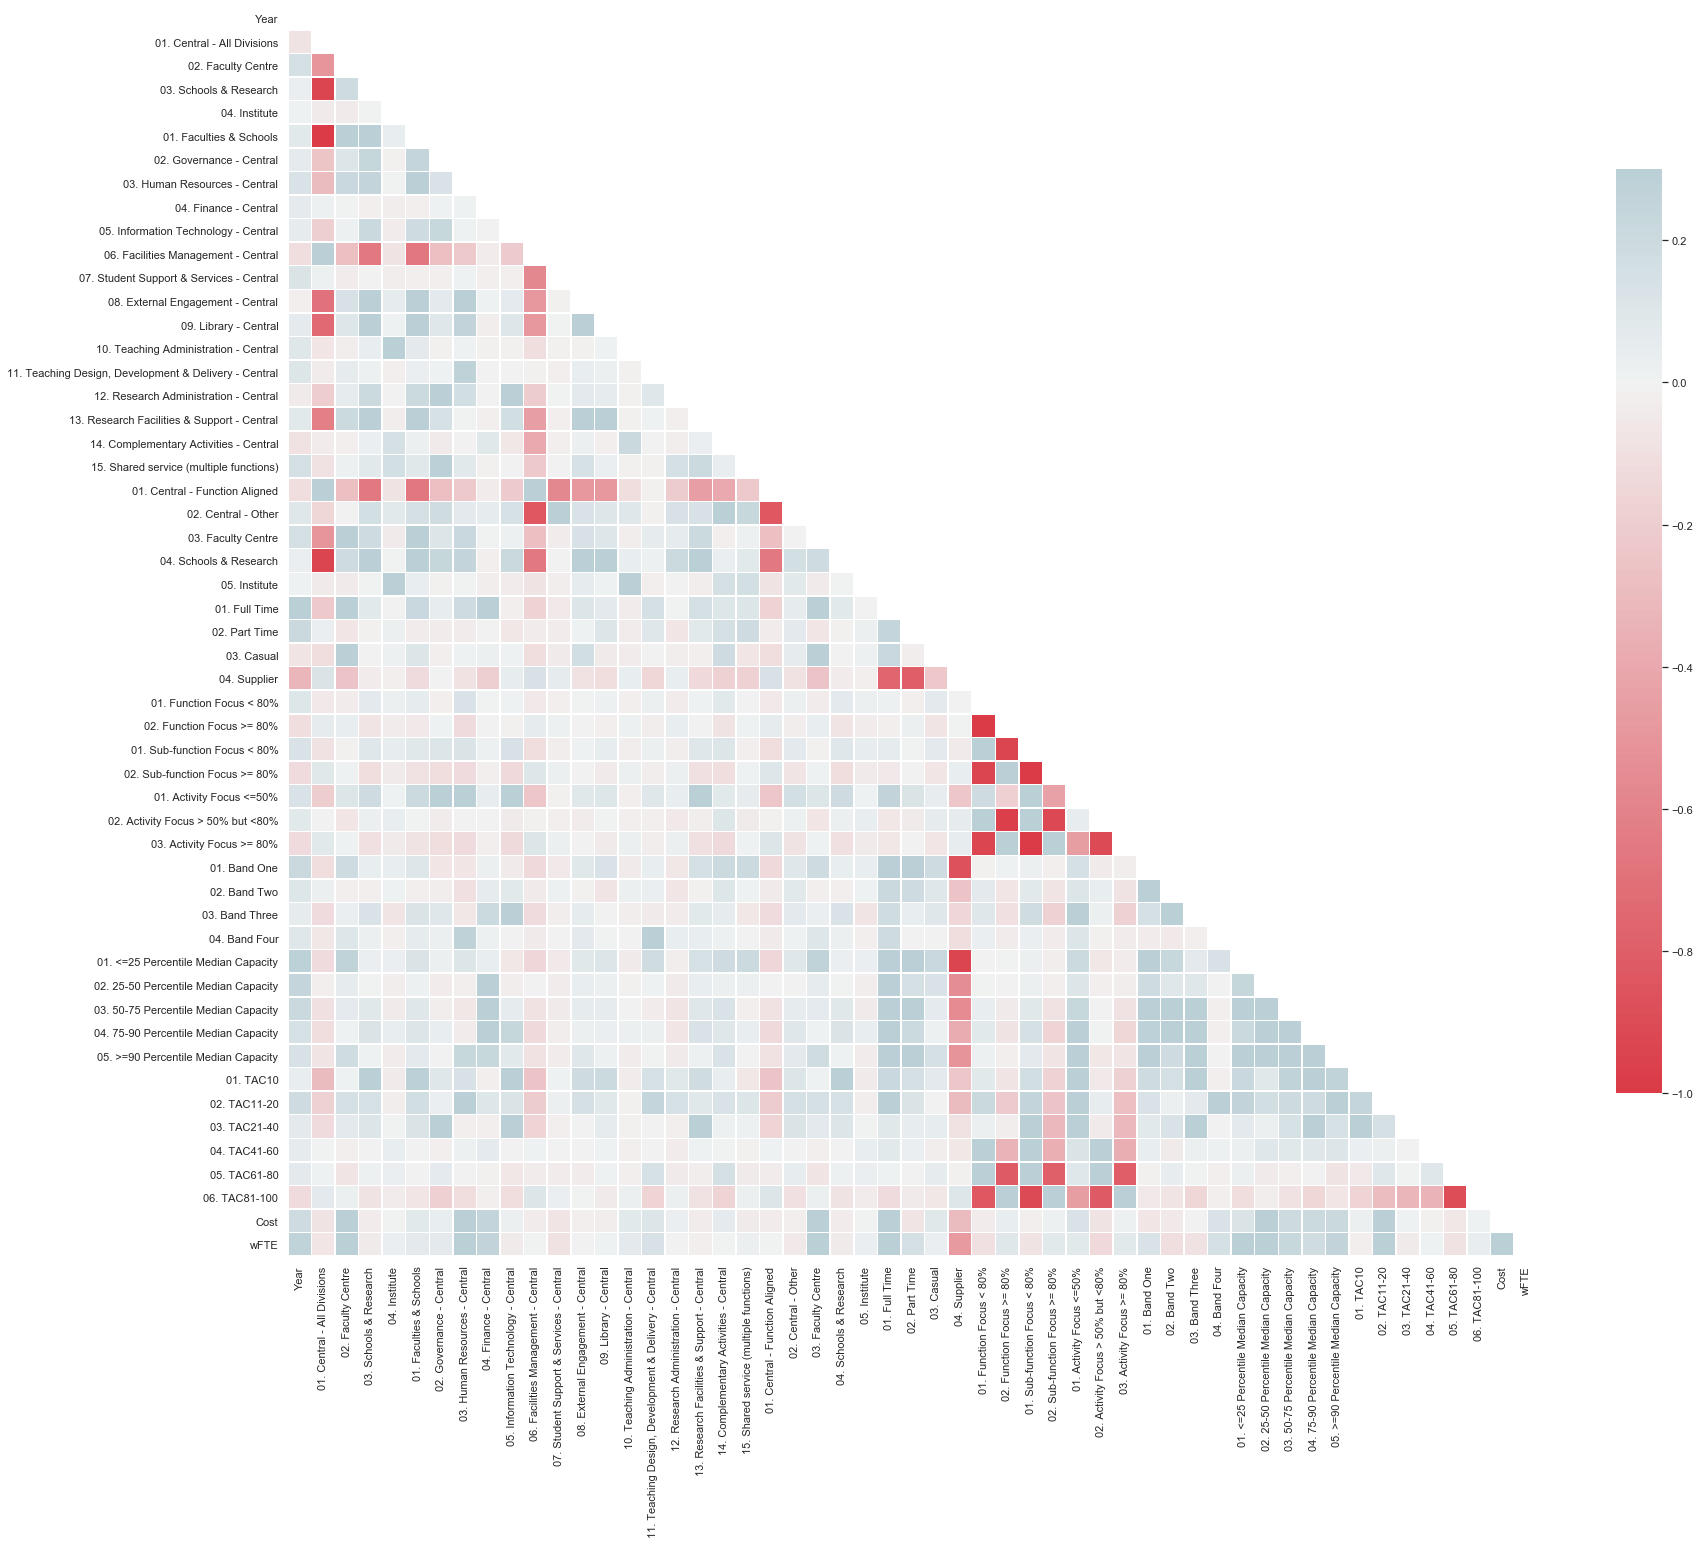

In [18]:
sn.set(style="white")

# Compute the correlation matrix
corr = all_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 34))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#sn.pairplot(x_vars=["Activity"], y_vars=["Norm Cost"], data=all_data, hue="Region", size=10) #[all_data['Latest Activity Collection']=='Y']

## Scatter Plots

In [19]:
all_data.columns[4:]

Index(['01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', '04. Institute', '01. Faculties & Schools',
       '02. Governance - Central', '03. Human Resources - Central',
       '04. Finance - Central', '05. Information Technology - Central',
       '06. Facilities Management - Central',
       '07. Student Support & Services - Central',
       '08. External Engagement - Central', '09. Library - Central',
       '10. Teaching Administration - Central',
       '11. Teaching Design, Development & Delivery - Central',
       '12. Research Administration - Central',
       '13. Research Facilities & Support - Central',
       '14. Complementary Activities - Central',
       '15. Shared service (multiple functions)',
       '01. Central - Function Aligned', '02. Central - Other',
       '03. Faculty Centre', '04. Schools & Research', '05. Institute',
       '01. Full Time', '02. Part Time', '03. Casual', '04. Supplier',
       '01. Function Focus < 80%', '0

In [ ]:
metric = 'Cost'
for x in all_data.columns[4:]:
    focus_for_graph = x

    g =sn.lmplot(x=focus_for_graph, y=metric, data=all_data, col="Region", hue="Latest Activity Collection")
    g = g.set(ylim=(0, 300)) #xlim=(0, 0.5),

    x = sn.jointplot(x=focus_for_graph, y=metric, data=all_data, kind="scatter")
    plt.clf()

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Central - All Divisions')

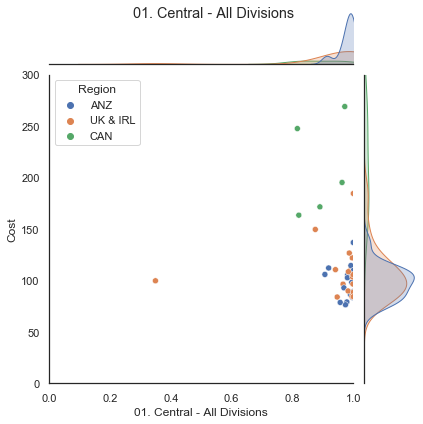

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Faculty Centre')

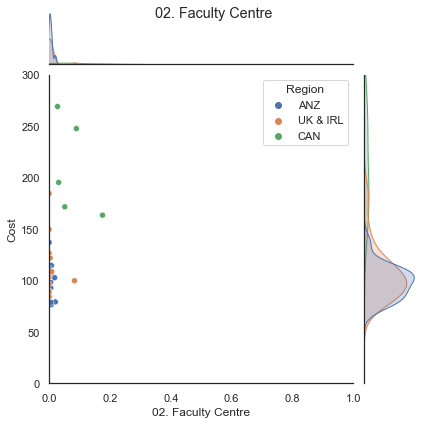

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. Schools & Research')

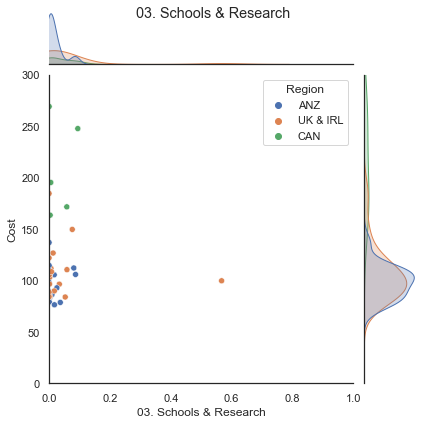

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. Institute')

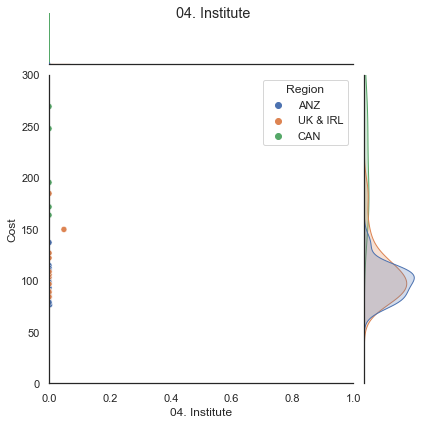

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Faculties & Schools')

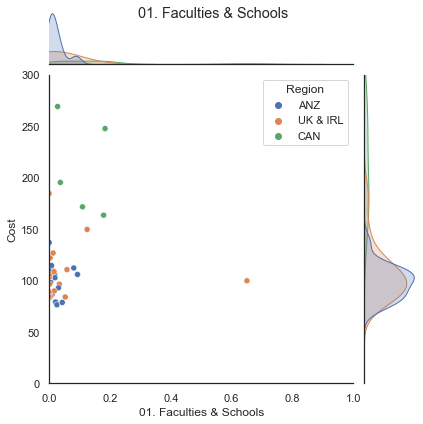

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Governance - Central')

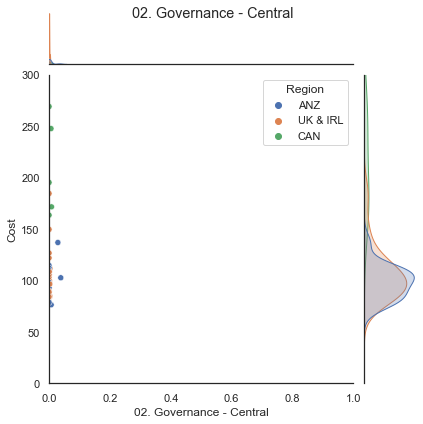

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0, 1)

(0, 300)

Text(0.5, 0.98, '03. Human Resources - Central')

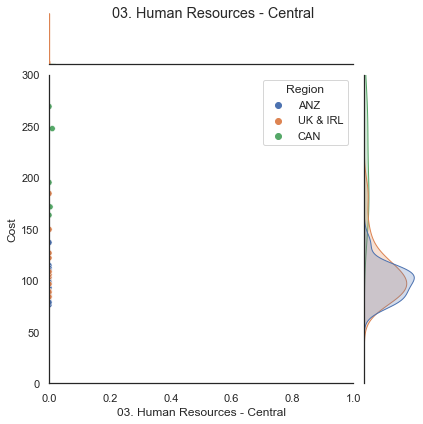

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. Finance - Central')

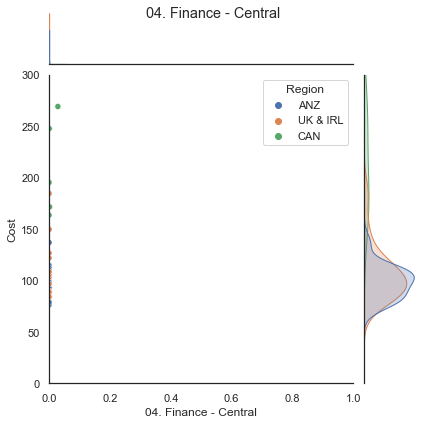

(0, 1)

(0, 300)

Text(0.5, 0.98, '05. Information Technology - Central')

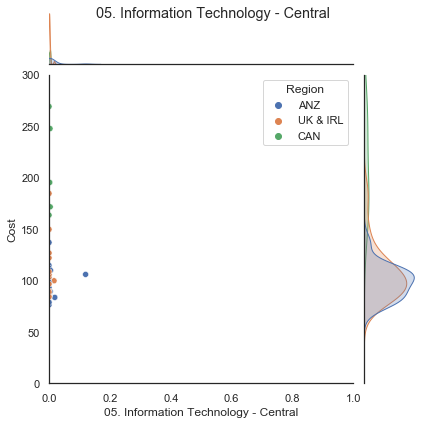

(0, 1)

(0, 300)

Text(0.5, 0.98, '06. Facilities Management - Central')

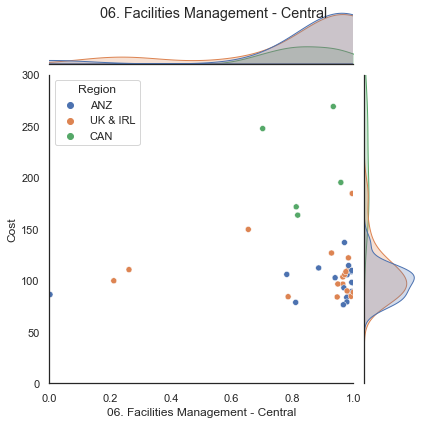

(0, 1)

(0, 300)

Text(0.5, 0.98, '07. Student Support & Services - Central')

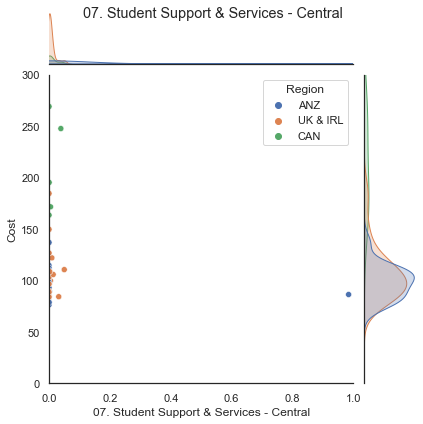

(0, 1)

(0, 300)

Text(0.5, 0.98, '08. External Engagement - Central')

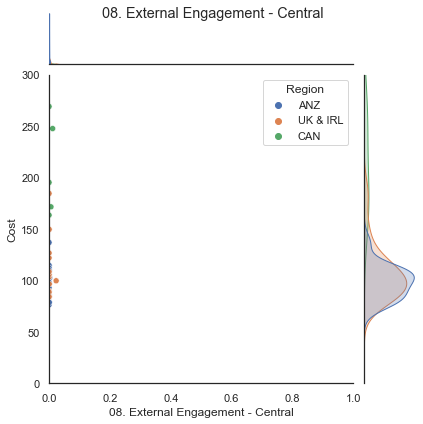

(0, 1)

(0, 300)

Text(0.5, 0.98, '09. Library - Central')

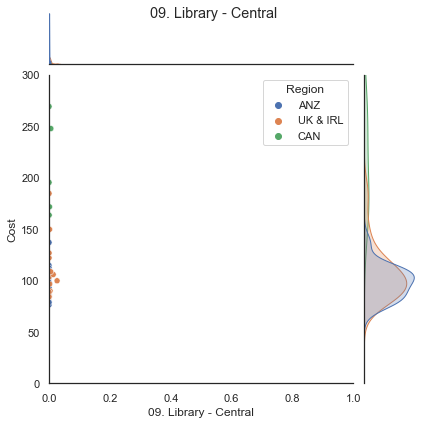

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0, 1)

(0, 300)

Text(0.5, 0.98, '10. Teaching Administration - Central')

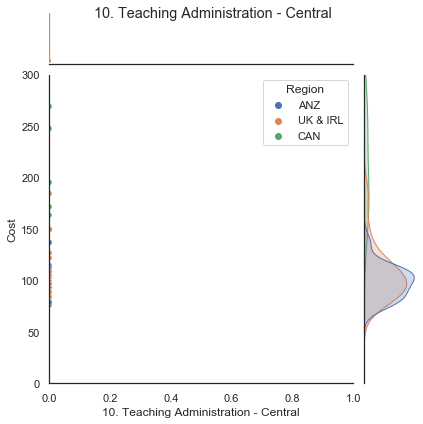

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0, 1)

(0, 300)

Text(0.5, 0.98, '11. Teaching Design, Development & Delivery - Central')

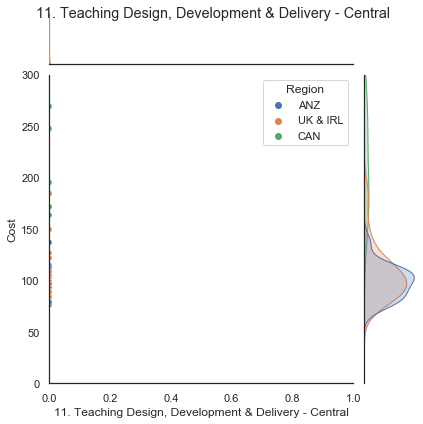

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0, 1)

(0, 300)

Text(0.5, 0.98, '12. Research Administration - Central')

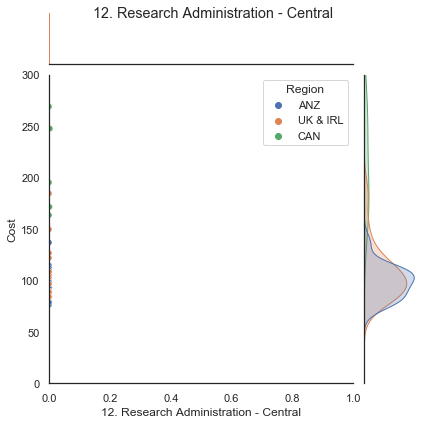

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0, 1)

(0, 300)

Text(0.5, 0.98, '13. Research Facilities & Support - Central')

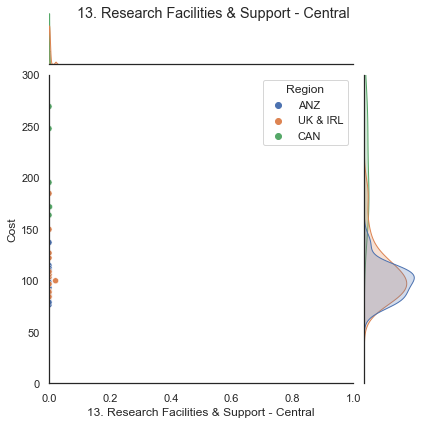

(0, 1)

(0, 300)

Text(0.5, 0.98, '14. Complementary Activities - Central')

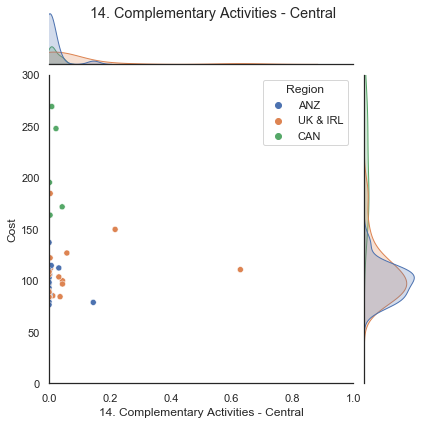

(0, 1)

(0, 300)

Text(0.5, 0.98, '15. Shared service (multiple functions)')

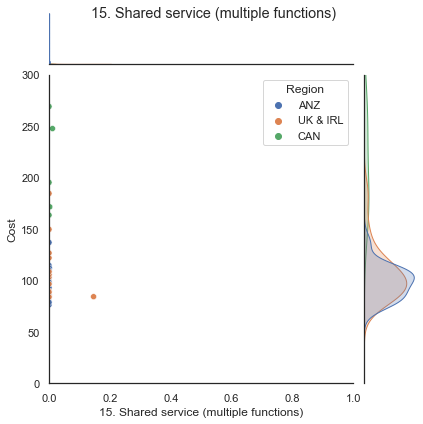

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Central - Function Aligned')

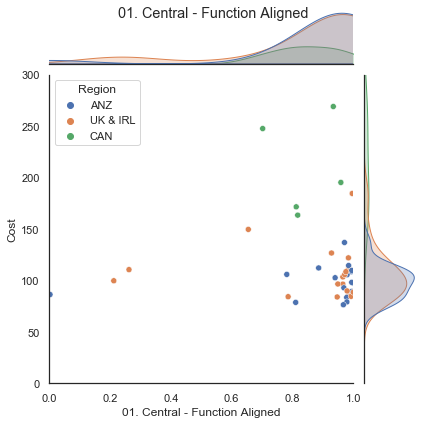

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Central - Other')

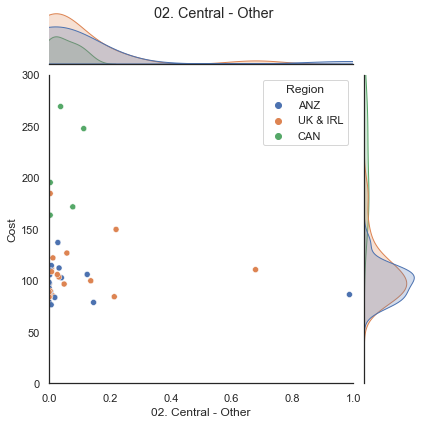

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. Faculty Centre')

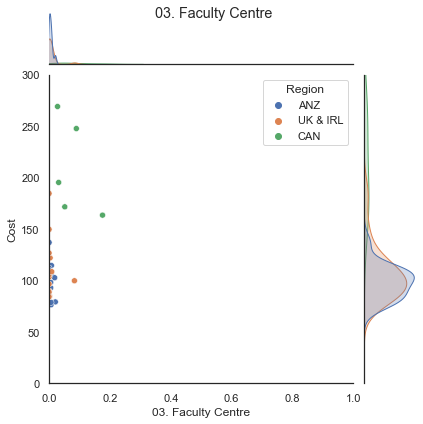

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. Schools & Research')

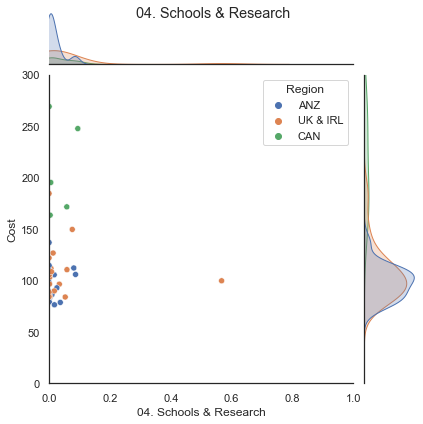

(0, 1)

(0, 300)

Text(0.5, 0.98, '05. Institute')

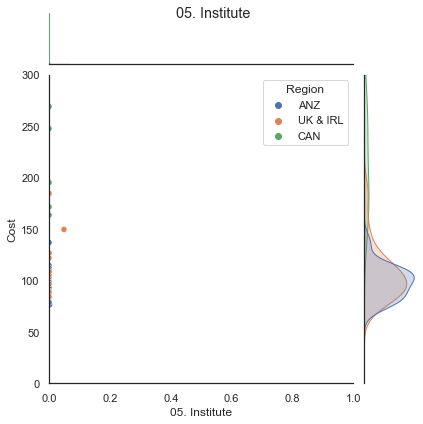

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Full Time')

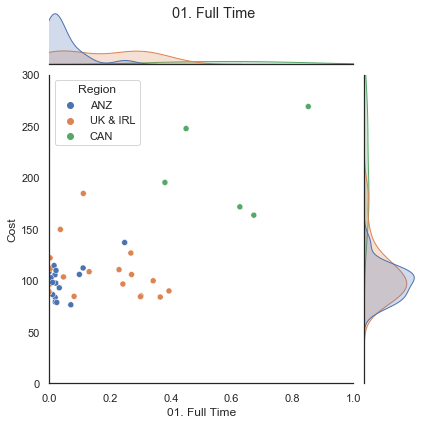

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Part Time')

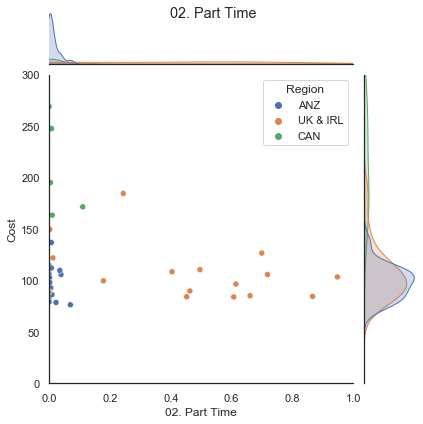

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. Casual')

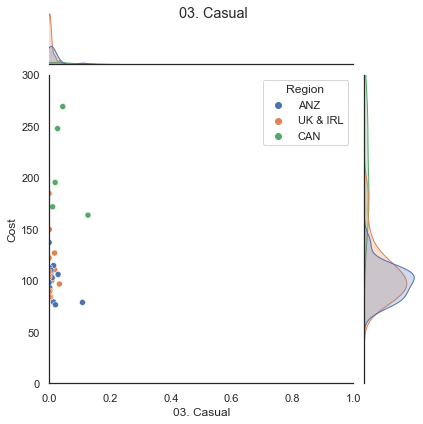

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. Supplier')

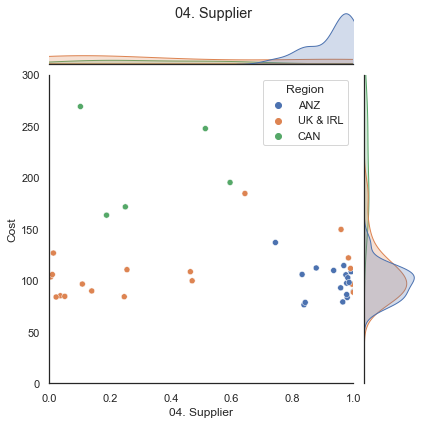

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Function Focus < 80%')

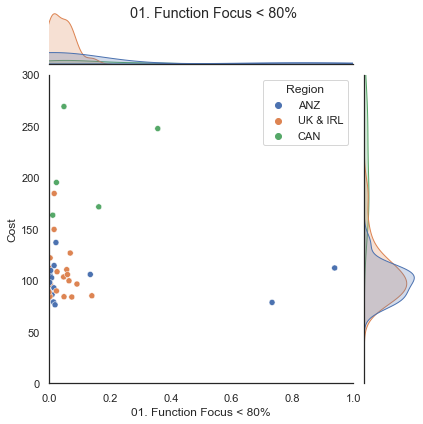

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Function Focus >= 80%')

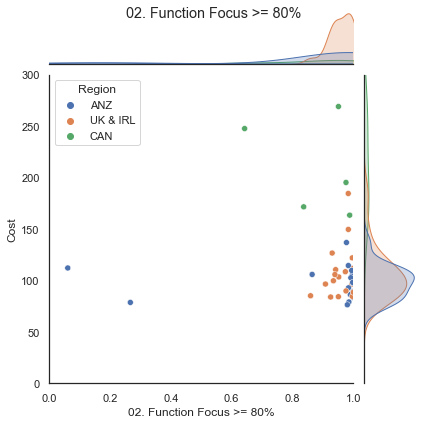

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Sub-function Focus < 80%')

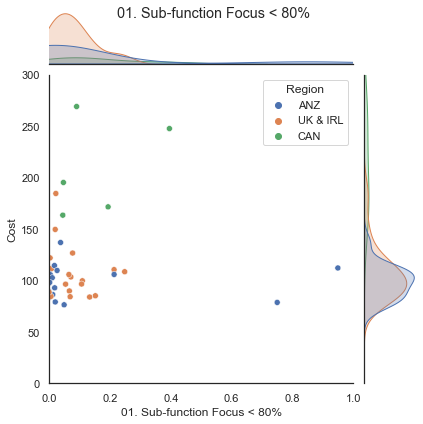

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Sub-function Focus >= 80%')

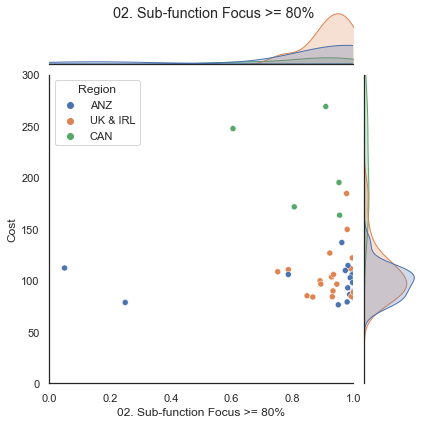

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Activity Focus <=50%')

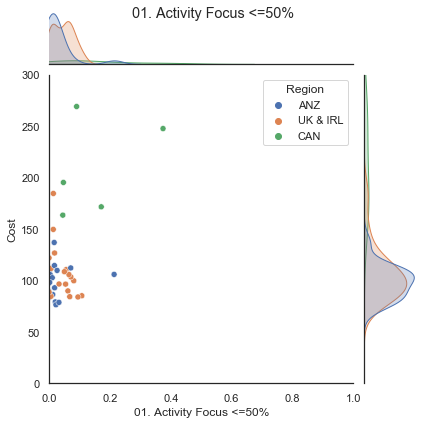

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Activity Focus > 50% but <80%')

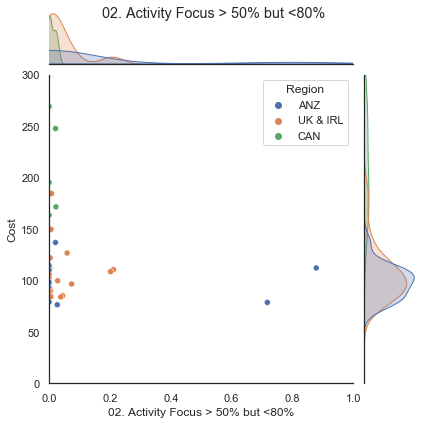

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. Activity Focus >= 80%')

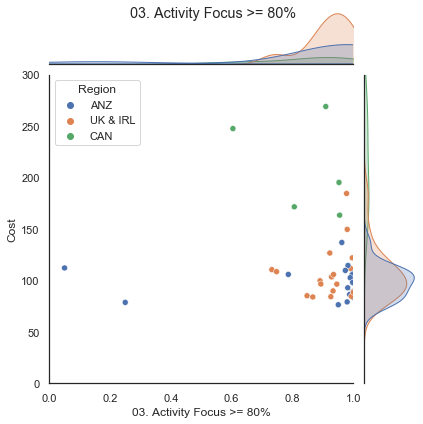

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. Band One')

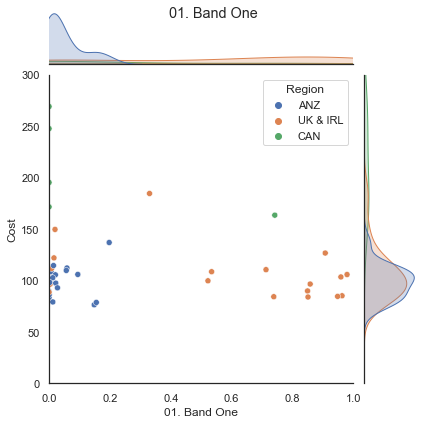

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. Band Two')

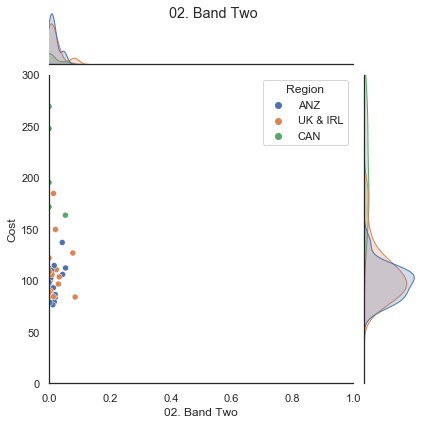

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. Band Three')

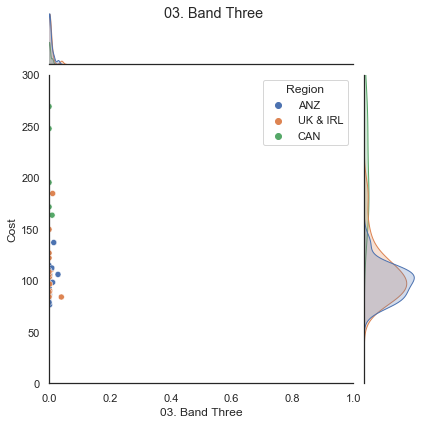

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. Band Four')

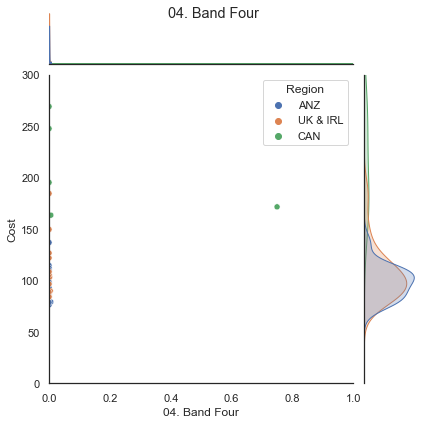

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. <=25 Percentile Median Capacity')

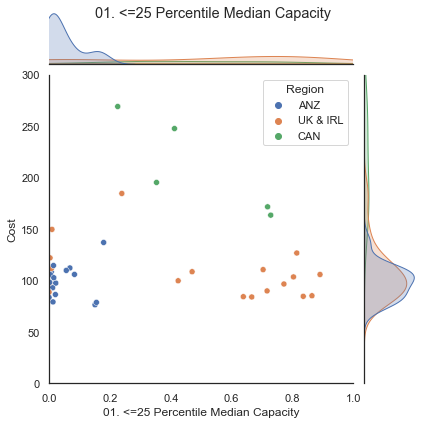

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. 25-50 Percentile Median Capacity')

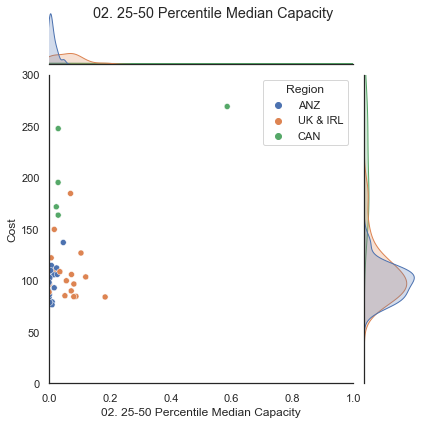

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. 50-75 Percentile Median Capacity')

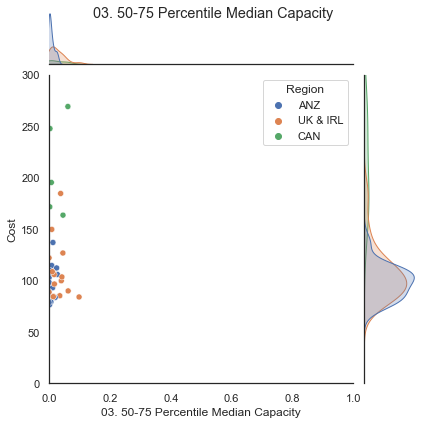

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. 75-90 Percentile Median Capacity')

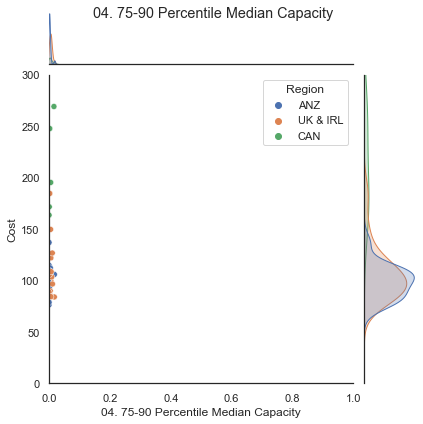

(0, 1)

(0, 300)

Text(0.5, 0.98, '05. >=90 Percentile Median Capacity')

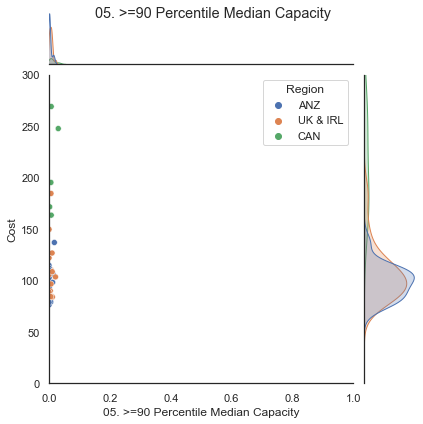

(0, 1)

(0, 300)

Text(0.5, 0.98, '01. TAC10')

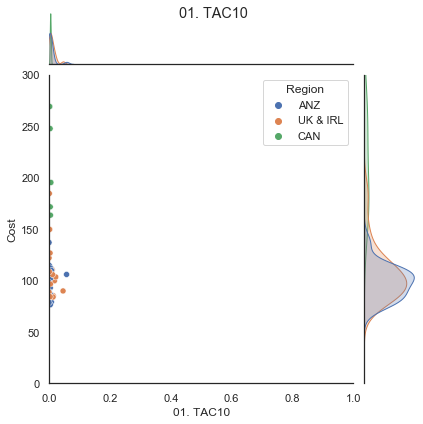

(0, 1)

(0, 300)

Text(0.5, 0.98, '02. TAC11-20')

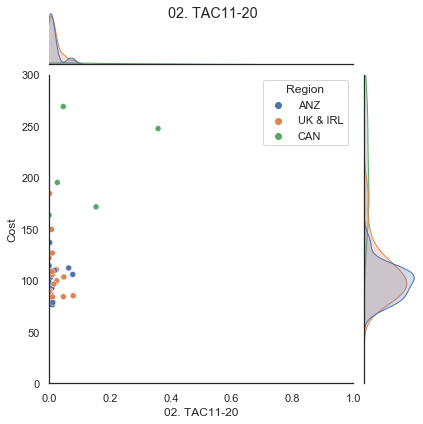

(0, 1)

(0, 300)

Text(0.5, 0.98, '03. TAC21-40')

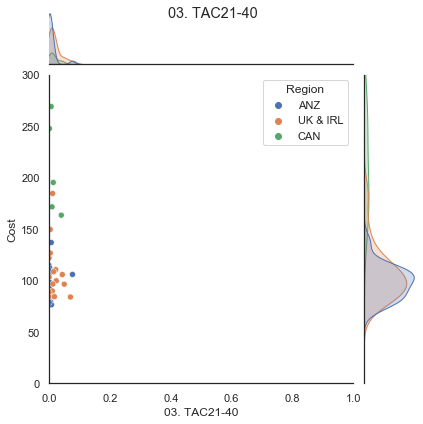

(0, 1)

(0, 300)

Text(0.5, 0.98, '04. TAC41-60')

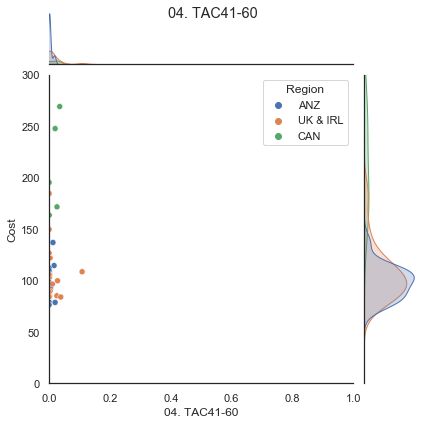

(0, 1)

(0, 300)

Text(0.5, 0.98, '05. TAC61-80')

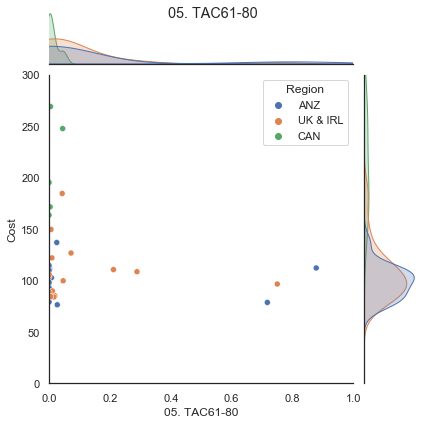

(0, 1)

(0, 300)

Text(0.5, 0.98, '06. TAC81-100')

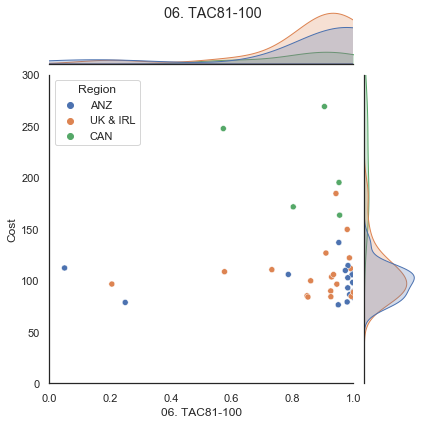

(0, 1)

(0, 300)

Text(0.5, 0.98, 'Cost')

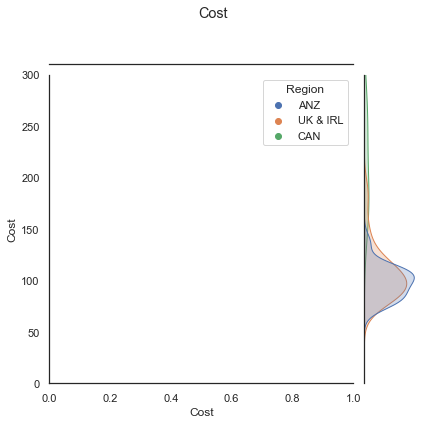

(0, 1)

(0, 300)

Text(0.5, 0.98, 'wFTE')

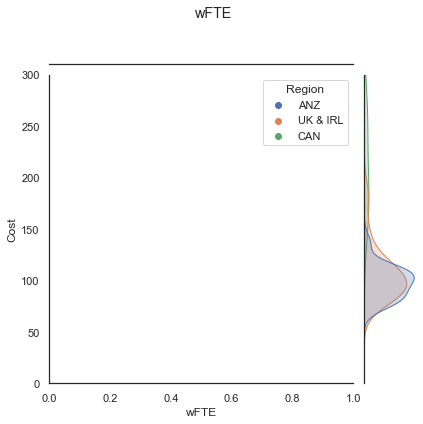

In [20]:
# Create scatter plots for every SDM metric & Norm Cost for only the last Activity Collections for each university

metric = 'Cost'
for x in all_data.columns[4:]:
    focus_for_graph = x
    plot = sn.jointplot(x=focus_for_graph, y=metric, data=all_data[all_data['Latest Activity Collection']=='Y'], kind="scatter", hue='Region')
    
    plot.ax_marg_x.set_xlim(0, 1)
    plot.ax_marg_y.set_ylim(0, 300)

    plot.fig.suptitle(x)
    plt.show()

## Filter data before PCA & KMeans Analysis

In [22]:
#cell to get rid of columns that are very low
all_data.columns
all_data.describe()

Index(['Year', 'Uni', 'Latest Activity Collection', 'Region',
       '01. Central - All Divisions', '02. Faculty Centre',
       '03. Schools & Research', '04. Institute', '01. Faculties & Schools',
       '02. Governance - Central', '03. Human Resources - Central',
       '04. Finance - Central', '05. Information Technology - Central',
       '06. Facilities Management - Central',
       '07. Student Support & Services - Central',
       '08. External Engagement - Central', '09. Library - Central',
       '10. Teaching Administration - Central',
       '11. Teaching Design, Development & Delivery - Central',
       '12. Research Administration - Central',
       '13. Research Facilities & Support - Central',
       '14. Complementary Activities - Central',
       '15. Shared service (multiple functions)',
       '01. Central - Function Aligned', '02. Central - Other',
       '03. Faculty Centre', '04. Schools & Research', '05. Institute',
       '01. Full Time', '02. Part Time', '03. 

,Year,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,Cost,wFTE
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2015.952381,0.960766,0.010912,0.027385,0.000936,0.039233,0.002789,0.000126,0.000629,0.003489,0.906849,0.014121,0.001067,0.001022,0.000004,0.000010,0.000350,0.000342,0.026710,0.003259,0.906849,0.053918,0.010912,0.027385,0.000936,0.122911,0.111224,0.018574,0.747290,0.070856,0.929144,0.094903,0.905097,0.043224,0.053720,0.903056,0.200231,0.013213,0.002557,0.004100,0.198232,0.035595,0.011991,0.002751,0.003561,0.007786,0.014730,0.015229,0.012625,0.064090,0.885540,107.211958,99.104869
std,2.251553,0.088386,0.029852,0.077678,0.004636,0.088386,0.014608,0.000828,0.003953,0.018415,0.158625,0.095557,0.004683,0.005083,0.000057,0.000064,0.001940,0.002244,0.063236,0.020532,0.158625,0.119157,0.029852,0.077678,0.004636,0.190807,0.219046,0.039087,0.329931,0.183984,0.183984,0.201377,0.201377,0.083732,0.180074,0.202094,0.303336,0.017535,0.006435,0.051695,0.275505,0.095782,0.022412,0.005483,0.006486,0.011788,0.032137,0.062485,0.057346,0.192561,0.223381,35.331815,45.998999
min,2012.000000,0.336141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,0.032225,0.000000,0.000963,0.000000,0.000000,0.000963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000963,0.000000,0.000000
25%,2014.000000,0.963130,0.000000,0.000761,0.000000,0.004291,0.000000,0.000000,0.000000,0.000000,0.886092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886092,0.000344,0.000000,0.000761,0.000000,0.017400,0.000000,0.000965,0.606534,0.003669,0.957887,0.009153,0.929450,0.006862,0.000000,0.928568,0.006756,0.001428,0.000000,0.000000,0.009429,0.001180,0.000000,0.000000,0.000000,0.001106,0.000000,0.000000,0.000000,0.000000,0.913866,88.403030,71.694386
50%,2016.000000,0.986719,0.000995,0.005528,0.000000,0.013281,0.000000,0.000000,0.000000,0.000000,0.962023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00007

In [33]:
all_data_prepped = all_data[[
    'Year',
    'Uni',
    'Latest Activity Collection',
    'Region',
    '01. Central - All Divisions',
    '02. Faculty Centre',
    '03. Schools & Research',
    '04. Institute',
    '01. Faculties & Schools',
    '02. Governance - Central',
    #'03. Human Resources - Central',
    '04. Finance - Central',
    '05. Information Technology - Central',
    '06. Facilities Management - Central',
    '07. Student Support & Services - Central',
    '08. External Engagement - Central',
    '09. Library - Central',
    #'10. Teaching Administration - Central',
    #'11. Teaching Design, Development & Delivery - Central',
    #'12. Research Administration - Central',
    '13. Research Facilities & Support - Central',
    '14. Complementary Activities - Central',
    '15. Shared service (multiple functions)',
    '01. Central - Function Aligned',
    '02. Central - Other',
    '03. Faculty Centre',
    '04. Schools & Research',
    '05. Institute',
    '01. Full Time',
    '02. Part Time',
    '03. Casual',
    '04. Supplier',
    '01. Function Focus < 80%',
    '02. Function Focus >= 80%',
    '01. Sub-function Focus < 80%',
    '02. Sub-function Focus >= 80%',
    '01. Activity Focus <=50%',
    '02. Activity Focus > 50% but <80%',
    '03. Activity Focus >= 80%',
    '01. Band One',
    '02. Band Two',
    '03. Band Three',
    '04. Band Four',
    '01. <=25 Percentile Median Capacity',
    '02. 25-50 Percentile Median Capacity',
    '03. 50-75 Percentile Median Capacity',
    '04. 75-90 Percentile Median Capacity',
    '05. >=90 Percentile Median Capacity',
    '01. TAC10',
    '02. TAC11-20',
    '03. TAC21-40',
    '04. TAC41-60',
    '05. TAC61-80',
    '06. TAC81-100',
    'Cost',
    'wFTE']]

In [34]:
all_data_prepped.select_dtypes(['number']).drop(columns=['Year','Cost','wFTE']).shape
all_data_prepped.select_dtypes(['number']).drop(columns=['Year','Cost','wFTE']).dropna().shape

all_data_prepped = all_data_prepped.select_dtypes(['number']).drop(columns=['Year','Cost','wFTE']).dropna()
all_data_prepped.head(5)

(210, 46)

(210, 46)

,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Faculties & Schools,02. Governance - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100
0,0.993122,0.002670,0.004208,0.00000,0.006878,0.0,0.0,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.000365,0.0,0.992757,0.000365,0.002670,0.004208,0.00000,0.034855,0.000000,0.004562,0.960582,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.027142,0.009705,0.000000,0.002571,0.027241,0.000000,0.009606,0.000000,0.002571,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818
1,0.997648,0.000035,0.002317,0.00000,0.002352,0.0,0.0,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.997648,0.000000,0.000035,0.002317,0.00000,0.015564,0.000000,0.005447,0.978989,0.015564,0.984436,0.017269,0.982731,0.017269,0.000000,0.982731,0.005447,0.007560,0.008004,0.000000,0.005447,0.002022,0.008811,0.004731,0.000000,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731
2,0.987524,0.007080,0.005075,0.00032,0.012476,0.0,0.0,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.987524,0.000000,0.007080,0.005075,0.00032,0.057222,0.158875,0.003137,0.780766,0.020320,0.979680,0.020320,0.979680,0.020320,0.000000,0.979680,0.208204,0.003016,0.000000,0.008014,0.210105,0.000000,0.000000,0.000068,0.009061,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680
3,0.999248,0.000000,0.000752,0.00000,0.000752,0.0,0.0,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.999248,0.000000,0.000000,0.000752,0.00000,0.017320,0.000109,0.000643,0.981929,0.005523,0.994477,0.010475,0.989525,0.012368,0.004952,0.982680,0.005704,0.005523,0.006845,0.000000,0.005704,0.000000,0.005523,0.000000,0.006845,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929
4,0.965049,0.001129,0.033822,0.00000,0.034951,0.0,0.0,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.000000,0.0,0.959356,0.005693,0.001129,0.033822,0.00000,0.025453,0.035216,0.001485,0.937846,0.002424,0.997576,0.013124,0.986876,0.018226,0.000000,0.981774,0.049701,0.010625,0.001828,0.000000,0.035026,0.003738,0.009646,0.013744,0.000000,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774


## PCA Analysis

In [35]:
#Normalize the data first
min_max_scaler = preprocessing.MinMaxScaler()

all_data_minmax = min_max_scaler.fit_transform(all_data_prepped)
all_data_minmax

array([[9.89639361e-01, 1.22661401e-02, 6.47601460e-03, ...,
        3.39555984e-03, 0.00000000e+00, 9.84803756e-01],
       [9.96457336e-01, 1.60957806e-04, 3.56580171e-03, ...,
        7.40131016e-03, 0.00000000e+00, 9.82714500e-01],
       [9.81207408e-01, 3.25223985e-02, 7.81091538e-03, ...,
        0.00000000e+00, 0.00000000e+00, 9.79660400e-01],
       ...,
       [9.57713696e-01, 1.27762746e-01, 3.96742048e-04, ...,
        4.66241106e-02, 4.68030079e-03, 9.04976638e-01],
       [7.30036128e-01, 8.06782676e-01, 5.50803189e-03, ...,
        5.88839201e-04, 0.00000000e+00, 9.54891072e-01],
       [9.44157863e-01, 1.44448453e-01, 8.65659726e-03, ...,
        7.27998380e-05, 0.00000000e+00, 9.52855658e-01]])

PCA-reduction with 1: Explained total variance: 0.3018479534958646: Explained individual variance: [0.30184795]
PCA-reduction with 2: Explained total variance: 0.5554363944660066: Explained individual variance: [0.30184795 0.25358844]
PCA-reduction with 3: Explained total variance: 0.6598211301340348: Explained individual variance: [0.30184795 0.25358844 0.10438474]
PCA-reduction with 4: Explained total variance: 0.7191303852545836: Explained individual variance: [0.30184795 0.25358844 0.10438474 0.05930926]
PCA-reduction with 5: Explained total variance: 0.764331762663659: Explained individual variance: [0.30184795 0.25358844 0.10438474 0.05930926 0.04520138]
PCA-reduction with 6: Explained total variance: 0.7985949310174685: Explained individual variance: [0.30184795 0.25358844 0.10438474 0.05930926 0.04520138 0.03426317]
PCA-reduction with 7: Explained total variance: 0.8259434263508411: Explained individual variance: [0.30184795 0.25358844 0.10438474 0.05930926 0.04520138 0.0342631

Text(0.5, 1.0, 'Total explained variance for PCA analysis')

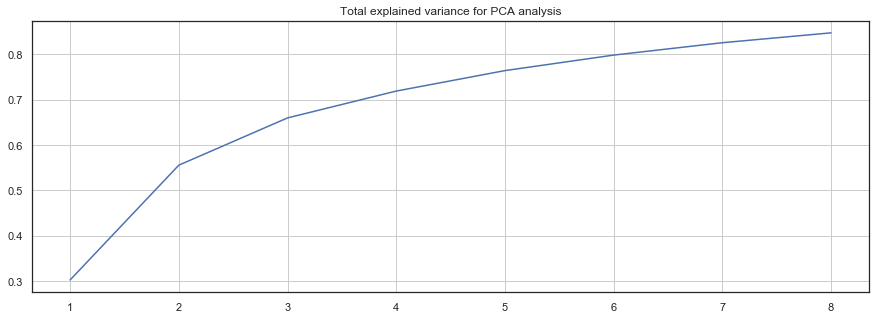

In [37]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

max_clusters = 9

total_variance = []
for i in range(1, max_clusters):

    pca_comp = i

    pca = PCA(n_components=pca_comp)

    principalComponents = pca.fit_transform(all_data_minmax)

    principalDf = pd.DataFrame(data=principalComponents, columns=[(
        "principal component " + str(x)) for x in range(1, pca_comp+1)])

    total_variance.append(sum(pca.explained_variance_ratio_))
    print("PCA-reduction with " + str(pca_comp) + ": Explained total variance: " +
          str(sum(pca.explained_variance_ratio_)) + ": Explained individual variance: " + str(pca.explained_variance_ratio_))


# now print a graph
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, max_clusters), total_variance)
plt.grid(True)

plt.title('Total explained variance for PCA analysis')

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

original shape:    (210, 46)
transformed shape: (210, 6)


([<matplotlib.axis.YTick at 0x1ec054e2ac8>,
 <a list of 6 Text yticklabel objects>)

([<matplotlib.axis.XTick at 0x1ec06158488>,
 <a list of 46 Text xticklabel objects>)

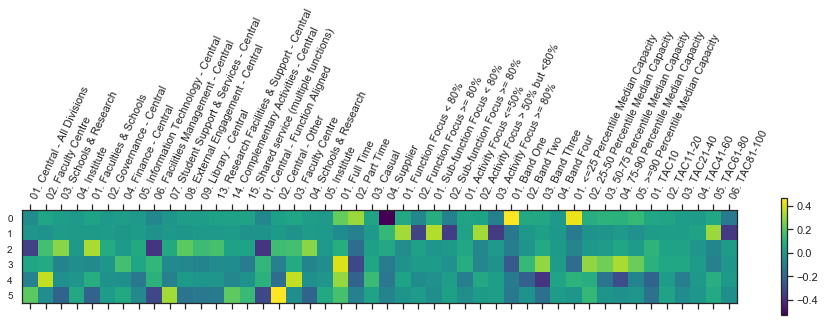

In [44]:
no_clusters = 6

pca = PCA(n_components= no_clusters)
principalComponents = pca.fit_transform(all_data_minmax)
pca.fit(all_data_minmax)

all_data_minmax_pca = pca.transform(all_data_minmax)
print("original shape:   ", all_data_minmax.shape)
print("transformed shape:", all_data_minmax_pca.shape)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks(range(0,no_clusters),range(0,no_clusters),fontsize=10)
plt.colorbar()
plt.xticks(range(len(all_data_prepped.select_dtypes(['number']).columns)),list(all_data_prepped),rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

## K-means clustering

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Elbow curve')

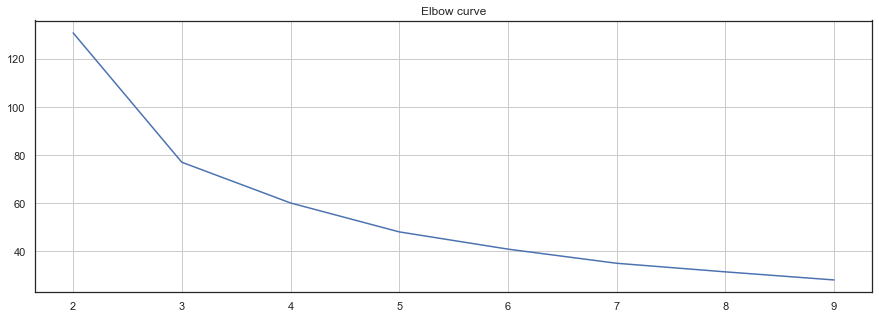

In [43]:
#Execute this cell if you want to use the PCA data
clustering_range = [2,10]

distorsions = []
for k in range(clustering_range[0], clustering_range[1]):
    kmeans = KMeans(n_clusters=k,init= 'k-means++', algorithm="full", n_jobs=1)
    kmeans.fit(all_data_minmax_pca) #
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(clustering_range[0], clustering_range[1]), distorsions)
plt.grid(True)
plt.title('Elbow curve')

##### Test how robust the dataset is for the clusters to be used

In [48]:
# Test to see how consistent the K_Means clustering is
k_means_cluster = 5

for i in range(0,10):

    kmeans = KMeans(n_clusters=k_means_cluster,init= 'k-means++', algorithm="full", n_jobs=1)
    kmeans.fit(all_data_minmax_pca)
    #print(kmeans.inertia_)

    kmeans.fit(all_data_minmax_pca)
    labels = kmeans.labels_

    # add cluster labels to the original dataset
    cluster_results = all_data
    cluster_results['KMeans Labels'] = [str(x) for x in labels]

    cluster_results.groupby('KMeans Labels').describe()['Cost'][['count','50%']].sort_values('50%')

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,11.0,87.376663
3,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
4,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,11.0,87.376663
3,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
4,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,11.0,87.376663
4,4.0,96.201172
0,31.0,96.464617
1,149.0,97.993910
3,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
3,11.0,87.376663
1,4.0,96.201172
2,31.0,96.464617
0,149.0,97.993910
4,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
3,11.0,87.376663
4,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
2,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,11.0,87.376663
3,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
4,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,11.0,87.376663
4,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
3,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
1,11.0,87.376663
4,4.0,96.201172
2,31.0,96.464617
0,149.0,97.993910
3,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
2,11.0,87.376663
4,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
3,15.0,163.389106


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,50%
KMeans Labels,,
3,11.0,87.376663
0,4.0,96.201172
4,31.0,96.464617
2,149.0,97.993910
1,15.0,163.389106


##### Generate the clusters and save the data

In [52]:
k_means_cluster = 5

kmeans = KMeans(n_clusters=k_means_cluster,init= 'k-means++', algorithm="full", n_jobs=1)
kmeans.fit(all_data_minmax_pca)
print(kmeans.inertia_)

kmeans.fit(all_data_minmax_pca)
labels = kmeans.labels_

# add cluster labels to the original dataset
cluster_results = all_data
cluster_results['KMeans Labels'] = [str(x) for x in labels]

cluster_results.groupby('KMeans Labels').describe()
cluster_results.groupby('KMeans Labels').describe().to_excel(activity_to_filter +'KMeansClusters_Descriptive_Statistics.xlsx')
cluster_results.to_excel(activity_to_filter +'_Merged_SDMREGCLUSTER.xlsx')

cluster_results.groupby('KMeans Labels').describe()['Cost'][['count','50%']].sort_values('50%')

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

47.92847125273859


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Year                                                          \
               count         mean       std     min     25%     50%      75%   
KMeans Labels                                                                  
0              149.0  2015.442953  2.258266  2012.0  2014.0  2015.0  2017.00   
1               31.0  2017.225806  1.606439  2015.0  2016.0  2017.0  2019.00   
2               11.0  2016.727273  1.678744  2014.0  2015.5  2017.0  2018.00   
3                4.0  2016.250000  0.500000  2016.0  2016.0  2016.0  2016.25   
4               15.0  2017.733333  1.980861  2012.0  2017.0  2018.0  2019.00   

                      01. Central - All Divisions                      \
                  max                       count      mean       std   
KMeans Labels                                                           
0              2020.0                       149.0  0.977484  0.029025   
1              2020.0                        31.0  0.980134  0.020888   
2              2019.0                        11.0  0.955348  0.034571   
3              2017.0                         4.0  0.403915  0.121001   
4              2020.0                        15.0  0.907143  0.085358   

                                                                 \
                    min       25%       50%       75%       max   
KMeans Labels                                                     
0              0.832925  0.968443  0.989649  0.996479  1.000000   
1              0.932148  0.963360  0.987338  0.996988  1.000000   
2              0.880502  0.937771  0.962187  0.983656  0.993414   
3              0.336141  0.342535  0.347147  0.408527  0.585224   
4              0.779127  0.828892  0.962057  0.978969  0.999234   

              02. Faculty Centre                                          \
                           count      mean       std       min       25%   
KMeans Labels                                                              
0                          149.0  0.005804  0.011847  0.000000  0.000000   
1                           31.0  0.002879  0.007703  0.000000  0.000000   
2                           11.0  0.004726  0.006833  0.000000  0.000000   
3                            4.0  0.057179  0.035167  0.005609  0.050341   
4                           15.0  0.070453  0.080833  0.000000  0.011225   

                                            03. Schools & Research            \
                    50%       75%       max                  count      mean   
KMeans Labels                                                                  
0              0.000971  0.005348  0.061259                  149.0  0.015938   
1              0.000000  0.000557  0.030214                   31.0  0.015095   
2              0.003460  0.005396  0.023588                   11.0  0.038361   
3              0.069863  0.076700  0.083380                    4.0  0.538487   
4              0.027814  0.125383  0.217703                   15.0  0.022147   

                                                                           \
                    std       min       25%       50%       75%       max   
KMeans Labels                                                               
0              0.025717  0.000000  0.000391  0.005075  0.021038  0.147908   
1              0.019867  0.000000  0.002618  0.006849  0.015568  0.067852   
2              0.032722  0.000000  0.010212  0.035543  0.060261  0.095910   
3              0.131810  0.347844  0.512206  0.578189  0.604470  0.649724   
4              0.035555  0.000000  0.000204  0.003579  0.027339  0.105137   

              04. Institute                                              \
                      count      mean       std  min  25%  50%      75%   
KMeans Labels                                                             
0                     149.0  0.000773  0.004217  0.0  0.0  0.0  0.00000   
1                      31.0  0.001891  0.007474  0.0  0.0  0.0  0.00000   
2          

,count,50%
KMeans Labels,,
2,11.0,87.376663
3,4.0,96.201172
1,31.0,96.464617
0,149.0,97.993910
4,15.0,163.389106


In [ ]:
#execute if you want to feed the model Raw data (non-PCA'ed)

clustering_range = [2,10]

distorsions = []
for k in range(clustering_range[0], clustering_range[1]):
    kmeans = KMeans(n_clusters=k,init= 'k-means++', algorithm="full", n_jobs=1)
    kmeans.fit(all_data.drop(columns=['Year','Norm Cost', 'Norm WFTE']).select_dtypes(['number']).dropna()) #Execute if you don't want to follow PCA analysi
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(clustering_range[0], clustering_range[1]), distorsions)
plt.grid(True)
plt.title('Elbow curve')

k_means_cluster = 5

kmeans = KMeans(n_clusters=k_means_cluster,init= 'k-means++', algorithm="full", n_jobs=1)
kmeans.fit(all_data.drop(columns=['Year','Norm Cost', 'Norm WFTE']).select_dtypes(['number']).dropna())
print(kmeans.inertia_)

kmeans.fit(all_data.drop(columns=['Year','Norm Cost', 'Norm WFTE']).select_dtypes(['number']).dropna())
labels = kmeans.labels_

### Vizualizing Cost per cluster

In [57]:
cluster_results['KMeans Labels'] = cluster_results['KMeans Labels'].astype(int)
cluster_results.head(5)

,Year,Uni,Latest Activity Collection,Region,01. Central - All Divisions,02. Faculty Centre,03. Schools & Research,04. Institute,01. Faculties & Schools,02. Governance - Central,03. Human Resources - Central,04. Finance - Central,05. Information Technology - Central,06. Facilities Management - Central,07. Student Support & Services - Central,08. External Engagement - Central,09. Library - Central,10. Teaching Administration - Central,"11. Teaching Design, Development & Delivery - Central",12. Research Administration - Central,13. Research Facilities & Support - Central,14. Complementary Activities - Central,15. Shared service (multiple functions),01. Central - Function Aligned,02. Central - Other,03. Faculty Centre,04. Schools & Research,05. Institute,01. Full Time,02. Part Time,03. Casual,04. Supplier,01. Function Focus < 80%,02. Function Focus >= 80%,01. Sub-function Focus < 80%,02. Sub-function Focus >= 80%,01. Activity Focus <=50%,02. Activity Focus > 50% but <80%,03. Activity Focus >= 80%,01. Band One,02. Band Two,03. Band Three,04. Band Four,01. <=25 Percentile Median Capacity,02. 25-50 Percentile Median Capacity,03. 50-75 Percentile Median Capacity,04. 75-90 Percentile Median Capacity,05. >=90 Percentile Median Capacity,01. TAC10,02. TAC11-20,03. TAC21-40,04. TAC41-60,05. TAC61-80,06. TAC81-100,Cost,wFTE,KMeans Labels
0,2012,05B,N,ANZ,0.993122,0.002670,0.004208,0.00000,0.006878,0.0,0.0,0.0,0.000000,0.992757,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000365,0.0,0.992757,0.000365,0.002670,0.004208,0.00000,0.034855,0.000000,0.004562,0.960582,0.014458,0.985542,0.015182,0.984818,0.015182,0.000000,0.984818,0.027142,0.009705,0.000000,0.002571,0.027241,0.000000,0.009606,0.000000,0.002571,0.004337,0.008304,0.000000,0.002541,0.000000,0.984818,79.268540,76.339205,0
1,2012,06C,N,ANZ,0.997648,0.000035,0.002317,0.00000,0.002352,0.0,0.0,0.0,0.000000,0.997648,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.997648,0.000000,0.000035,0.002317,0.00000,0.015564,0.000000,0.005447,0.978989,0.015564,0.984436,0.017269,0.982731,0.017269,0.000000,0.982731,0.005447,0.007560,0.008004,0.000000,0.005447,0.002022,0.008811,0.004731,0.000000,0.001284,0.003727,0.006720,0.005538,0.000000,0.982731,115.621276,129.859779,0
2,2012,07N,N,ANZ,0.987524,0.007080,0.005075,0.00032,0.012476,0.0,0.0,0.0,0.000000,0.987524,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.987524,0.000000,0.007080,0.005075,0.00032,0.057222,0.158875,0.003137,0.780766,0.020320,0.979680,0.020320,0.979680,0.020320,0.000000,0.979680,0.208204,0.003016,0.000000,0.008014,0.210105,0.000000,0.000000,0.000068,0.009061,0.012061,0.008259,0.000000,0.000000,0.000000,0.979680,88.351096,109.423617,0
3,2012,08O,N,ANZ,0.999248,0.000000,0.000752,0.00000,0.000752,0.0,0.0,0.0,0.000000,0.999248,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.999248,0.000000,0.000000,0.000752,0.00000,0.017320,0.000109,0.000643,0.981929,0.005523,0.994477,0.010475,0.989525,0.012368,0.004952,0.982680,0.005704,0.005523,0.006845,0.000000,0.005704,0.000000,0.005523,0.000000,0.006845,0.000000,0.000000,0.006845,0.010475,0.000752,0.981929,126.237819,140.783603,0
4,2012,09F,N,ANZ,0.965049,0.001129,0.033822,0.00000,0.034951,0.0,0.0,0.0,0.002443,0.959356,0.001249,0.000596,0.001405,0.0,0.0,0.0,0.0,0.000000,0.0,0.959356,0.005693,0.001129,0.033822,0.00000,0.025453,0.035216,0.001485,0.937846,0.002424,0.997576,0.013124,0.986876,0.018226,0.000000,0.981774,0.049701,0.010625,0.001828,0.000000,0.035026,0.003738,0.009646,0.013744,0.000000,0.007526,0.001954,0.000000,0.008746,0.000000,0.981774,75.011018,75.772420,0


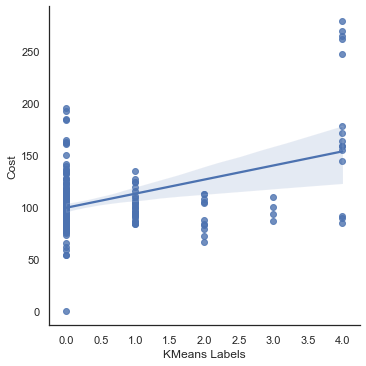

In [58]:
g =sn.lmplot(x='KMeans Labels', y='Cost', data=cluster_results) #, col="Region", hue="Latest Activity Collection"
#g = g.set(ylim=(0, 300)) #xlim=(0, 0.5),